In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics

from tensorflow import keras
from keras import models
from keras import layers

import matplotlib.pyplot as plt

# Exploratory Data Analysis (EDA)

# Load the dataset

In [2]:
df = pd.read_csv("Data/features_30_sec.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

In [4]:
df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,...,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,...,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,661794.000000,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,5533.810460,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,675808.000000,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


# Feature Selection

In [5]:
X = df.loc[:, 'chroma_stft_mean':'mfcc20_var']
y = df['label']

In [6]:
le = LabelEncoder()
y = le.fit_transform(y)

## Splitting the Dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Feature Prototype

## Prototype Training

In [8]:
prototype_model = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu",
                       input_shape=(X_train.shape[1],)),
    keras.layers.Dense(10, activation="softmax"),
])

## Compilation

In [9]:
prototype_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## Prototype Fitting

In [10]:
prototype_history = prototype_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128)

Epoch 1/100
6/6 [==============================] - 1s 66ms/step - loss: 78566.5703 - accuracy: 0.1194 - val_loss: 39381.4492 - val_accuracy: 0.0758
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 60395.8789 - accuracy: 0.1119 - val_loss: 50539.5781 - val_accuracy: 0.1030
Epoch 3/100
6/6 [==============================] - 0s 14ms/step - loss: 45883.8516 - accuracy: 0.0881 - val_loss: 28054.6543 - val_accuracy: 0.1030
Epoch 4/100
6/6 [==============================] - 0s 17ms/step - loss: 27621.7383 - accuracy: 0.1269 - val_loss: 21377.8730 - val_accuracy: 0.1424
Epoch 5/100
6/6 [==============================] - 0s 14ms/step - loss: 19411.8184 - accuracy: 0.1313 - val_loss: 17291.3125 - val_accuracy: 0.1030
Epoch 6/100
6/6 [==============================] - 0s 15ms/step - loss: 17454.4199 - accuracy: 0.1045 - val_loss: 10910.5801 - val_accuracy: 0.1818
Epoch 7/100
6/6 [==============================] - 0s 14ms/step - loss: 13985.3848 - accuracy: 0.1567 - val_loss

6/6 [==============================] - 0s 12ms/step - loss: 9873.3613 - accuracy: 0.2507 - val_loss: 10218.7227 - val_accuracy: 0.1879
Epoch 57/100
6/6 [==============================] - 0s 13ms/step - loss: 8610.8271 - accuracy: 0.2522 - val_loss: 8336.1475 - val_accuracy: 0.1879
Epoch 58/100
6/6 [==============================] - 0s 14ms/step - loss: 7167.9746 - accuracy: 0.2388 - val_loss: 5756.2002 - val_accuracy: 0.2697
Epoch 59/100
6/6 [==============================] - 0s 12ms/step - loss: 8216.3086 - accuracy: 0.2537 - val_loss: 10458.3955 - val_accuracy: 0.2030
Epoch 60/100
6/6 [==============================] - 0s 14ms/step - loss: 9399.4541 - accuracy: 0.2522 - val_loss: 6911.5576 - val_accuracy: 0.2030
Epoch 61/100
6/6 [==============================] - 0s 12ms/step - loss: 8115.9746 - accuracy: 0.1821 - val_loss: 9030.6895 - val_accuracy: 0.2303
Epoch 62/100
6/6 [==============================] - 0s 12ms/step - loss: 9561.9424 - accuracy: 0.2687 - val_loss: 7358.8696 - val

## Prototype Validation

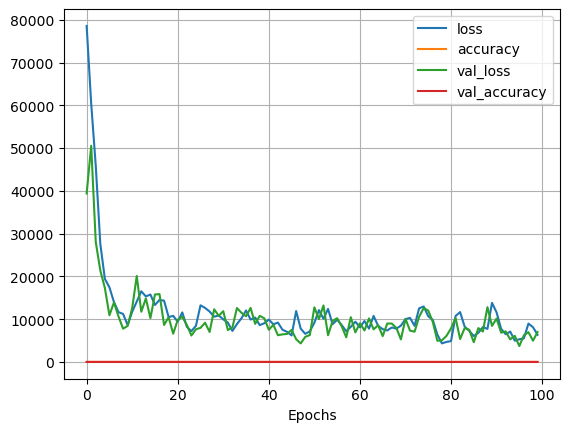

In [11]:
pd.DataFrame(prototype_history.history).plot()
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)
plt.show()

## Prototype Evaluation

In [12]:
prototype_model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 2ms/step - loss: 6980.7402 - accuracy: 0.3152


[6980.740234375, 0.31515151262283325]

In [13]:
y_pred = np.argmax(prototype_model.predict(X_test),axis=1)

macro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'macro')
print(f"Macro-Averaged Precision score: {round(macro_averaged_precision, 4)}")

micro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged Precision score: {round(micro_averaged_precision, 4)}")

macro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'macro')
print(f"Macro-averaged recall score: {round(macro_averaged_recall, 4)}")

micro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged recall score: {round(micro_averaged_recall, 4)}")

macro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'macro')
print(f"Macro-Averaged F1 score: {round(macro_averaged_f1, 4)}")

micro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged F1 score: {round(micro_averaged_f1, 4)}")

11/11 [==============================] - 0s 2ms/step
Macro-Averaged Precision score: 0.1821
Micro-Averaged Precision score: 0.3152
Macro-averaged recall score: 0.2967
Micro-Averaged recall score: 0.3152
Macro-Averaged F1 score: 0.1818
Micro-Averaged F1 score: 0.3152


C:\Users\sungj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model 1
## Model 1 Training

In [14]:
model1 = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu",
                       input_shape=(X_train.shape[1],)),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

## Compilation

In [15]:
model1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## Model 1 Fitting

In [16]:
model1_history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128)

Epoch 1/100
6/6 [==============================] - 1s 68ms/step - loss: 51832.0469 - accuracy: 0.0925 - val_loss: 18856.6855 - val_accuracy: 0.1061
Epoch 2/100
6/6 [==============================] - 0s 15ms/step - loss: 18419.3867 - accuracy: 0.1179 - val_loss: 15886.0938 - val_accuracy: 0.1000
Epoch 3/100
6/6 [==============================] - 0s 16ms/step - loss: 10161.7607 - accuracy: 0.1388 - val_loss: 3707.7844 - val_accuracy: 0.1061
Epoch 4/100
6/6 [==============================] - 0s 17ms/step - loss: 3471.0754 - accuracy: 0.1119 - val_loss: 233.0024 - val_accuracy: 0.0818
Epoch 5/100
6/6 [==============================] - 0s 15ms/step - loss: 196.0898 - accuracy: 0.1090 - val_loss: 32.8145 - val_accuracy: 0.1273
Epoch 6/100
6/6 [==============================] - 0s 15ms/step - loss: 17.7646 - accuracy: 0.1179 - val_loss: 2.3022 - val_accuracy: 0.0909
Epoch 7/100
6/6 [==============================] - 0s 17ms/step - loss: 2.5650 - accuracy: 0.1060 - val_loss: 2.3085 - val_accur

Epoch 59/100
6/6 [==============================] - 0s 14ms/step - loss: 2.2950 - accuracy: 0.1045 - val_loss: 2.3050 - val_accuracy: 0.0909
Epoch 60/100
6/6 [==============================] - 0s 14ms/step - loss: 2.2950 - accuracy: 0.1045 - val_loss: 2.3050 - val_accuracy: 0.0909
Epoch 61/100
6/6 [==============================] - 0s 15ms/step - loss: 2.2950 - accuracy: 0.1045 - val_loss: 2.3051 - val_accuracy: 0.0909
Epoch 62/100
6/6 [==============================] - 0s 14ms/step - loss: 2.2950 - accuracy: 0.0970 - val_loss: 2.3052 - val_accuracy: 0.0909
Epoch 63/100
6/6 [==============================] - 0s 14ms/step - loss: 2.2949 - accuracy: 0.1075 - val_loss: 2.3052 - val_accuracy: 0.0909
Epoch 64/100
6/6 [==============================] - 0s 14ms/step - loss: 2.2949 - accuracy: 0.1075 - val_loss: 2.3053 - val_accuracy: 0.0909
Epoch 65/100
6/6 [==============================] - 0s 13ms/step - loss: 2.2949 - accuracy: 0.1075 - val_loss: 2.3053 - val_accuracy: 0.0909
Epoch 66/100


## Model 1 Validation

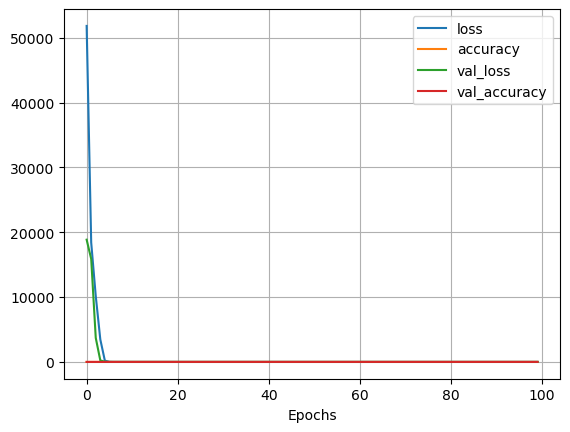

In [17]:
pd.DataFrame(model1_history.history).plot()
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)
plt.show()

## Model 1 Evaluation

In [18]:
model1.evaluate(X_test, y_test)

11/11 [==============================] - 0s 3ms/step - loss: 2.3071 - accuracy: 0.0909


[2.3071227073669434, 0.09090909361839294]

In [19]:
y_pred = np.argmax(model1.predict(X_test),axis=1)

macro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'macro')
print(f"Macro-Averaged Precision score: {round(macro_averaged_precision, 4)}")

micro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged Precision score: {round(micro_averaged_precision, 4)}")

macro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'macro')
print(f"Macro-averaged recall score: {round(macro_averaged_recall, 4)}")

micro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged recall score: {round(micro_averaged_recall, 4)}")

macro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'macro')
print(f"Macro-Averaged F1 score: {round(macro_averaged_f1, 4)}")

micro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged F1 score: {round(micro_averaged_f1, 4)}")

11/11 [==============================] - 0s 2ms/step
Macro-Averaged Precision score: 0.0091
Micro-Averaged Precision score: 0.0909
Macro-averaged recall score: 0.1
Micro-Averaged recall score: 0.0909
Macro-Averaged F1 score: 0.0167
Micro-Averaged F1 score: 0.0909


C:\Users\sungj\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Data Scaling

In [20]:
sc = StandardScaler()
sc.fit(X_train)
X_train_scale = sc.transform(X_train)
X_test_scale = sc.transform(X_test)

# Model 2
## Model 2 Training

In [21]:
model2 = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu",
                       input_shape=(X_train_scale.shape[1],)),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

## Compilation

In [22]:
model2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## Model 2 Fitting

In [23]:
model2_history = model2.fit(X_train_scale, y_train, validation_data=(X_test_scale, y_test), epochs=100, batch_size=128)

Epoch 1/100
6/6 [==============================] - 1s 69ms/step - loss: 2.1621 - accuracy: 0.2179 - val_loss: 1.9282 - val_accuracy: 0.3394
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 1.7772 - accuracy: 0.4254 - val_loss: 1.6371 - val_accuracy: 0.4788
Epoch 3/100
6/6 [==============================] - 0s 15ms/step - loss: 1.4667 - accuracy: 0.5478 - val_loss: 1.3689 - val_accuracy: 0.5182
Epoch 4/100
6/6 [==============================] - 0s 17ms/step - loss: 1.1923 - accuracy: 0.5970 - val_loss: 1.1873 - val_accuracy: 0.5939
Epoch 5/100
6/6 [==============================] - 0s 16ms/step - loss: 0.9580 - accuracy: 0.6821 - val_loss: 1.0387 - val_accuracy: 0.6394
Epoch 6/100
6/6 [==============================] - 0s 17ms/step - loss: 0.8004 - accuracy: 0.7194 - val_loss: 0.9924 - val_accuracy: 0.6303
Epoch 7/100
6/6 [==============================] - 0s 15ms/step - loss: 0.6919 - accuracy: 0.7537 - val_loss: 0.8837 - val_accuracy: 0.7273
Epoch 8/100
6/6 [===

6/6 [==============================] - 0s 16ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.2293 - val_accuracy: 0.7485
Epoch 60/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.2335 - val_accuracy: 0.7455
Epoch 61/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.2319 - val_accuracy: 0.7485
Epoch 62/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.2424 - val_accuracy: 0.7485
Epoch 63/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.2412 - val_accuracy: 0.7545
Epoch 64/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.2416 - val_accuracy: 0.7485
Epoch 65/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.2483 - val_accuracy: 0.7455
Epoch 66/100
6/6 [========

## Model 2 Validation

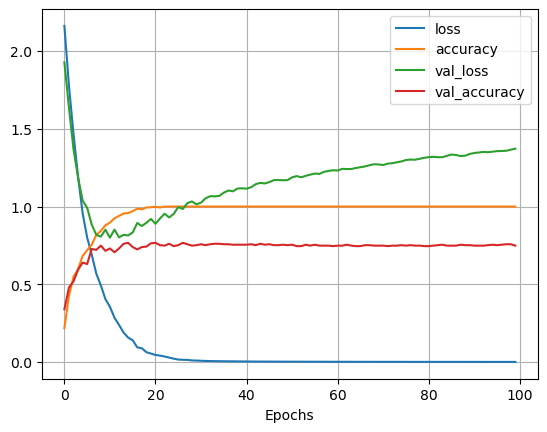

In [24]:
pd.DataFrame(model2_history.history).plot()
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)
plt.show()

## Model 2 Evaluation

In [25]:
model2.evaluate(X_test_scale, y_test)

11/11 [==============================] - 0s 3ms/step - loss: 1.3723 - accuracy: 0.7485


[1.372300624847412, 0.7484848499298096]

In [26]:
y_pred = np.argmax(model2.predict(X_test_scale),axis=1)

macro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'macro')
print(f"Macro-Averaged Precision score: {round(macro_averaged_precision, 4)}")

micro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged Precision score: {round(micro_averaged_precision, 4)}")

macro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'macro')
print(f"Macro-averaged recall score: {round(macro_averaged_recall, 4)}")

micro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged recall score: {round(micro_averaged_recall, 4)}")

macro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'macro')
print(f"Macro-Averaged F1 score: {round(macro_averaged_f1, 4)}")

micro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged F1 score: {round(micro_averaged_f1, 4)}")

11/11 [==============================] - 0s 2ms/step
Macro-Averaged Precision score: 0.7516
Micro-Averaged Precision score: 0.7485
Macro-averaged recall score: 0.7473
Micro-Averaged recall score: 0.7485
Macro-Averaged F1 score: 0.747
Micro-Averaged F1 score: 0.7485


# Model 3
## Model 3 Training

In [27]:
model3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(X_train_scale.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax"),
])

## Compilation

In [28]:
model3.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## Model 3 Fitting

In [29]:
model3_history = model3.fit(X_train_scale, y_train, validation_data=(X_test_scale, y_test), epochs=200, batch_size=128)

Epoch 1/200
6/6 [==============================] - 1s 71ms/step - loss: 2.2946 - accuracy: 0.1075 - val_loss: 2.1480 - val_accuracy: 0.3182
Epoch 2/200
6/6 [==============================] - 0s 18ms/step - loss: 2.1323 - accuracy: 0.2224 - val_loss: 1.9271 - val_accuracy: 0.3697
Epoch 3/200
6/6 [==============================] - 0s 18ms/step - loss: 1.9828 - accuracy: 0.2821 - val_loss: 1.7302 - val_accuracy: 0.4000
Epoch 4/200
6/6 [==============================] - 0s 19ms/step - loss: 1.8657 - accuracy: 0.3134 - val_loss: 1.5995 - val_accuracy: 0.4818
Epoch 5/200
6/6 [==============================] - 0s 18ms/step - loss: 1.7872 - accuracy: 0.3254 - val_loss: 1.5289 - val_accuracy: 0.4758
Epoch 6/200
6/6 [==============================] - 0s 18ms/step - loss: 1.7263 - accuracy: 0.3582 - val_loss: 1.4430 - val_accuracy: 0.5121
Epoch 7/200
6/6 [==============================] - 0s 18ms/step - loss: 1.6411 - accuracy: 0.4239 - val_loss: 1.3693 - val_accuracy: 0.5242
Epoch 8/200
6/6 [===

6/6 [==============================] - 0s 18ms/step - loss: 0.6121 - accuracy: 0.8030 - val_loss: 0.7645 - val_accuracy: 0.7333
Epoch 60/200
6/6 [==============================] - 0s 17ms/step - loss: 0.5825 - accuracy: 0.8179 - val_loss: 0.8236 - val_accuracy: 0.7364
Epoch 61/200
6/6 [==============================] - 0s 17ms/step - loss: 0.5452 - accuracy: 0.8299 - val_loss: 0.8066 - val_accuracy: 0.7545
Epoch 62/200
6/6 [==============================] - 0s 17ms/step - loss: 0.5189 - accuracy: 0.8194 - val_loss: 0.7840 - val_accuracy: 0.7545
Epoch 63/200
6/6 [==============================] - 0s 18ms/step - loss: 0.5569 - accuracy: 0.8209 - val_loss: 0.7706 - val_accuracy: 0.7424
Epoch 64/200
6/6 [==============================] - 0s 18ms/step - loss: 0.5285 - accuracy: 0.8433 - val_loss: 0.7551 - val_accuracy: 0.7606
Epoch 65/200
6/6 [==============================] - 0s 17ms/step - loss: 0.6453 - accuracy: 0.7955 - val_loss: 0.7876 - val_accuracy: 0.7606
Epoch 66/200
6/6 [========

6/6 [==============================] - 0s 17ms/step - loss: 0.3035 - accuracy: 0.9075 - val_loss: 0.8233 - val_accuracy: 0.7758
Epoch 118/200
6/6 [==============================] - 0s 17ms/step - loss: 0.3610 - accuracy: 0.8851 - val_loss: 0.8676 - val_accuracy: 0.7606
Epoch 119/200
6/6 [==============================] - 0s 17ms/step - loss: 0.3553 - accuracy: 0.8970 - val_loss: 0.8857 - val_accuracy: 0.7636
Epoch 120/200
6/6 [==============================] - 0s 16ms/step - loss: 0.3562 - accuracy: 0.9060 - val_loss: 0.8878 - val_accuracy: 0.7636
Epoch 121/200
6/6 [==============================] - 0s 16ms/step - loss: 0.3358 - accuracy: 0.9045 - val_loss: 0.8579 - val_accuracy: 0.7758
Epoch 122/200
6/6 [==============================] - 0s 16ms/step - loss: 0.3569 - accuracy: 0.8821 - val_loss: 0.8436 - val_accuracy: 0.7697
Epoch 123/200
6/6 [==============================] - 0s 18ms/step - loss: 0.3707 - accuracy: 0.8881 - val_loss: 0.8841 - val_accuracy: 0.7667
Epoch 124/200
6/6 [=

Epoch 175/200
6/6 [==============================] - 0s 18ms/step - loss: 0.2960 - accuracy: 0.8985 - val_loss: 0.9357 - val_accuracy: 0.7727
Epoch 176/200
6/6 [==============================] - 0s 16ms/step - loss: 0.2661 - accuracy: 0.9104 - val_loss: 0.9185 - val_accuracy: 0.7515
Epoch 177/200
6/6 [==============================] - 0s 16ms/step - loss: 0.2465 - accuracy: 0.9269 - val_loss: 0.9895 - val_accuracy: 0.7303
Epoch 178/200
6/6 [==============================] - 0s 16ms/step - loss: 0.2822 - accuracy: 0.9134 - val_loss: 1.0052 - val_accuracy: 0.7485
Epoch 179/200
6/6 [==============================] - 0s 17ms/step - loss: 0.2685 - accuracy: 0.9194 - val_loss: 1.0300 - val_accuracy: 0.7364
Epoch 180/200
6/6 [==============================] - 0s 17ms/step - loss: 0.2939 - accuracy: 0.9164 - val_loss: 0.9172 - val_accuracy: 0.7545
Epoch 181/200
6/6 [==============================] - 0s 16ms/step - loss: 0.2474 - accuracy: 0.9313 - val_loss: 0.9508 - val_accuracy: 0.7545
Epoch 

## Model 3 Validation

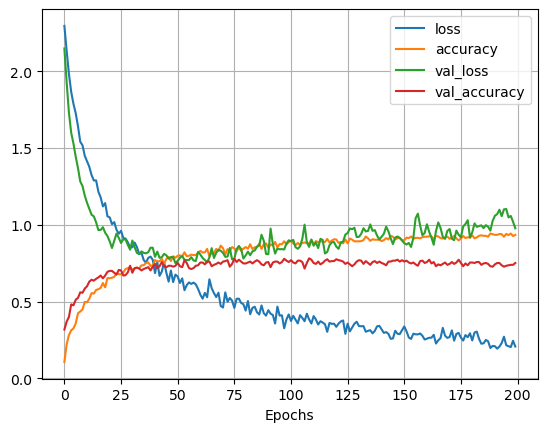

In [30]:
pd.DataFrame(model3_history.history).plot()
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)
plt.show()

## Model 3 Evaluation

In [31]:
model3.evaluate(X_test_scale, y_test)

11/11 [==============================] - 0s 3ms/step - loss: 0.9774 - accuracy: 0.7515


[0.9773817658424377, 0.7515151500701904]

In [32]:
y_pred = np.argmax(model3.predict(X_test_scale),axis=1)

macro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'macro')
print(f"Macro-Averaged Precision score: {round(macro_averaged_precision, 4)}")

micro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged Precision score: {round(micro_averaged_precision, 4)}")

macro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'macro')
print(f"Macro-averaged recall score: {round(macro_averaged_recall, 4)}")

micro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged recall score: {round(micro_averaged_recall, 4)}")

macro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'macro')
print(f"Macro-Averaged F1 score: {round(macro_averaged_f1, 4)}")

micro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged F1 score: {round(micro_averaged_f1, 4)}")

11/11 [==============================] - 0s 2ms/step
Macro-Averaged Precision score: 0.7577
Micro-Averaged Precision score: 0.7515
Macro-averaged recall score: 0.7492
Micro-Averaged recall score: 0.7515
Macro-Averaged F1 score: 0.7478
Micro-Averaged F1 score: 0.7515


# Model 4
## Model 4 Training

In [33]:
model4 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(X_train_scale.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax"),
])

## Compilation

In [34]:
model4.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## Model 4 Fitting

In [35]:
model4_history = model4.fit(X_train_scale, y_train, validation_data=(X_test_scale, y_test), epochs=400, batch_size=128)

Epoch 1/400
6/6 [==============================] - 1s 68ms/step - loss: 2.3146 - accuracy: 0.1060 - val_loss: 2.2791 - val_accuracy: 0.1515
Epoch 2/400
6/6 [==============================] - 0s 19ms/step - loss: 2.2780 - accuracy: 0.1179 - val_loss: 2.2536 - val_accuracy: 0.1636
Epoch 3/400
6/6 [==============================] - 0s 18ms/step - loss: 2.2577 - accuracy: 0.1627 - val_loss: 2.2096 - val_accuracy: 0.2333
Epoch 4/400
6/6 [==============================] - 0s 19ms/step - loss: 2.2269 - accuracy: 0.1627 - val_loss: 2.1465 - val_accuracy: 0.2636
Epoch 5/400
6/6 [==============================] - 0s 18ms/step - loss: 2.1642 - accuracy: 0.2254 - val_loss: 2.0552 - val_accuracy: 0.2727
Epoch 6/400
6/6 [==============================] - 0s 18ms/step - loss: 2.1279 - accuracy: 0.2254 - val_loss: 1.9449 - val_accuracy: 0.2394
Epoch 7/400
6/6 [==============================] - 0s 18ms/step - loss: 2.0423 - accuracy: 0.2761 - val_loss: 1.8444 - val_accuracy: 0.3697
Epoch 8/400
6/6 [===

6/6 [==============================] - 0s 19ms/step - loss: 0.9371 - accuracy: 0.7060 - val_loss: 1.0900 - val_accuracy: 0.6909
Epoch 60/400
6/6 [==============================] - 0s 16ms/step - loss: 1.0096 - accuracy: 0.6612 - val_loss: 1.0399 - val_accuracy: 0.6909
Epoch 61/400
6/6 [==============================] - 0s 17ms/step - loss: 0.9487 - accuracy: 0.6896 - val_loss: 0.9504 - val_accuracy: 0.7030
Epoch 62/400
6/6 [==============================] - 0s 17ms/step - loss: 0.9919 - accuracy: 0.6776 - val_loss: 1.0234 - val_accuracy: 0.6727
Epoch 63/400
6/6 [==============================] - 0s 16ms/step - loss: 0.9636 - accuracy: 0.6821 - val_loss: 0.9933 - val_accuracy: 0.6970
Epoch 64/400
6/6 [==============================] - 0s 18ms/step - loss: 1.0116 - accuracy: 0.6522 - val_loss: 1.0171 - val_accuracy: 0.7030
Epoch 65/400
6/6 [==============================] - 0s 17ms/step - loss: 0.8847 - accuracy: 0.6940 - val_loss: 1.0820 - val_accuracy: 0.6758
Epoch 66/400
6/6 [========

6/6 [==============================] - 0s 17ms/step - loss: 0.5399 - accuracy: 0.8313 - val_loss: 0.9557 - val_accuracy: 0.7545
Epoch 118/400
6/6 [==============================] - 0s 17ms/step - loss: 0.6449 - accuracy: 0.8104 - val_loss: 0.9045 - val_accuracy: 0.7545
Epoch 119/400
6/6 [==============================] - 0s 17ms/step - loss: 0.5562 - accuracy: 0.8194 - val_loss: 0.9727 - val_accuracy: 0.7485
Epoch 120/400
6/6 [==============================] - 0s 17ms/step - loss: 0.5760 - accuracy: 0.8254 - val_loss: 0.9710 - val_accuracy: 0.7515
Epoch 121/400
6/6 [==============================] - 0s 17ms/step - loss: 0.5690 - accuracy: 0.8418 - val_loss: 1.0020 - val_accuracy: 0.7636
Epoch 122/400
6/6 [==============================] - 0s 17ms/step - loss: 0.5873 - accuracy: 0.8164 - val_loss: 1.0120 - val_accuracy: 0.7455
Epoch 123/400
6/6 [==============================] - 0s 17ms/step - loss: 0.6039 - accuracy: 0.8075 - val_loss: 1.0319 - val_accuracy: 0.7333
Epoch 124/400
6/6 [=

Epoch 175/400
6/6 [==============================] - 0s 17ms/step - loss: 0.3946 - accuracy: 0.8955 - val_loss: 0.9784 - val_accuracy: 0.7394
Epoch 176/400
6/6 [==============================] - 0s 18ms/step - loss: 0.3467 - accuracy: 0.8881 - val_loss: 0.9865 - val_accuracy: 0.7515
Epoch 177/400
6/6 [==============================] - 0s 17ms/step - loss: 0.4338 - accuracy: 0.8881 - val_loss: 0.9681 - val_accuracy: 0.7636
Epoch 178/400
6/6 [==============================] - 0s 17ms/step - loss: 0.4397 - accuracy: 0.8806 - val_loss: 1.0239 - val_accuracy: 0.7576
Epoch 179/400
6/6 [==============================] - 0s 17ms/step - loss: 0.3887 - accuracy: 0.8881 - val_loss: 1.1166 - val_accuracy: 0.7424
Epoch 180/400
6/6 [==============================] - 0s 17ms/step - loss: 0.4541 - accuracy: 0.8746 - val_loss: 1.0781 - val_accuracy: 0.7515
Epoch 181/400
6/6 [==============================] - 0s 17ms/step - loss: 0.4678 - accuracy: 0.8836 - val_loss: 1.0070 - val_accuracy: 0.7667
Epoch 

Epoch 233/400
6/6 [==============================] - 0s 18ms/step - loss: 0.3615 - accuracy: 0.8955 - val_loss: 1.0134 - val_accuracy: 0.7788
Epoch 234/400
6/6 [==============================] - 0s 17ms/step - loss: 0.4232 - accuracy: 0.8791 - val_loss: 1.0086 - val_accuracy: 0.7909
Epoch 235/400
6/6 [==============================] - 0s 16ms/step - loss: 0.3297 - accuracy: 0.9104 - val_loss: 0.9916 - val_accuracy: 0.7758
Epoch 236/400
6/6 [==============================] - 0s 16ms/step - loss: 0.3307 - accuracy: 0.9000 - val_loss: 0.9269 - val_accuracy: 0.7697
Epoch 237/400
6/6 [==============================] - 0s 17ms/step - loss: 0.3224 - accuracy: 0.9090 - val_loss: 0.9312 - val_accuracy: 0.7636
Epoch 238/400
6/6 [==============================] - 0s 17ms/step - loss: 0.3118 - accuracy: 0.9194 - val_loss: 0.9753 - val_accuracy: 0.7697
Epoch 239/400
6/6 [==============================] - 0s 17ms/step - loss: 0.3832 - accuracy: 0.9015 - val_loss: 1.0099 - val_accuracy: 0.7758
Epoch 

Epoch 291/400
6/6 [==============================] - 0s 19ms/step - loss: 0.2980 - accuracy: 0.9239 - val_loss: 0.9623 - val_accuracy: 0.7485
Epoch 292/400
6/6 [==============================] - 0s 18ms/step - loss: 0.3444 - accuracy: 0.9149 - val_loss: 1.0166 - val_accuracy: 0.7485
Epoch 293/400
6/6 [==============================] - 0s 18ms/step - loss: 0.3640 - accuracy: 0.8985 - val_loss: 1.0464 - val_accuracy: 0.7515
Epoch 294/400
6/6 [==============================] - 0s 18ms/step - loss: 0.3320 - accuracy: 0.9179 - val_loss: 1.0407 - val_accuracy: 0.7424
Epoch 295/400
6/6 [==============================] - 0s 18ms/step - loss: 0.3343 - accuracy: 0.9194 - val_loss: 0.9921 - val_accuracy: 0.7697
Epoch 296/400
6/6 [==============================] - 0s 17ms/step - loss: 0.2657 - accuracy: 0.9328 - val_loss: 1.0161 - val_accuracy: 0.7758
Epoch 297/400
6/6 [==============================] - 0s 18ms/step - loss: 0.2864 - accuracy: 0.9239 - val_loss: 1.0232 - val_accuracy: 0.7576
Epoch 

Epoch 349/400
6/6 [==============================] - 0s 16ms/step - loss: 0.3598 - accuracy: 0.9299 - val_loss: 0.9973 - val_accuracy: 0.7697
Epoch 350/400
6/6 [==============================] - 0s 17ms/step - loss: 0.2835 - accuracy: 0.9239 - val_loss: 0.9638 - val_accuracy: 0.7667
Epoch 351/400
6/6 [==============================] - 0s 16ms/step - loss: 0.2836 - accuracy: 0.9239 - val_loss: 1.0093 - val_accuracy: 0.7515
Epoch 352/400
6/6 [==============================] - 0s 16ms/step - loss: 0.2446 - accuracy: 0.9224 - val_loss: 1.0861 - val_accuracy: 0.7424
Epoch 353/400
6/6 [==============================] - 0s 17ms/step - loss: 0.2482 - accuracy: 0.9254 - val_loss: 1.2945 - val_accuracy: 0.7455
Epoch 354/400
6/6 [==============================] - 0s 17ms/step - loss: 0.3177 - accuracy: 0.9164 - val_loss: 1.2018 - val_accuracy: 0.7576
Epoch 355/400
6/6 [==============================] - 0s 17ms/step - loss: 0.2120 - accuracy: 0.9478 - val_loss: 1.1251 - val_accuracy: 0.7545
Epoch 

## Model 4 Validation

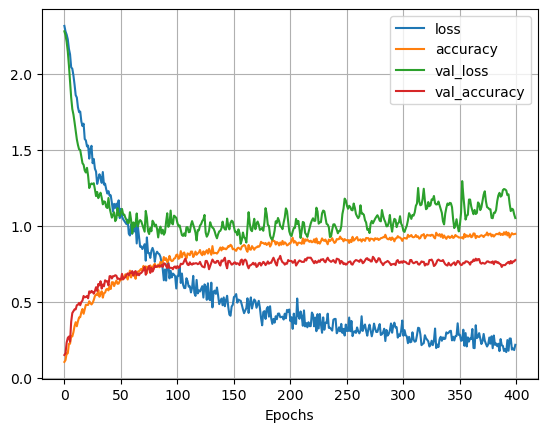

In [36]:
pd.DataFrame(model4_history.history).plot()
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)
plt.show()

## Model 4 Evaluation

In [37]:
model4.evaluate(X_test_scale, y_test)

11/11 [==============================] - 0s 4ms/step - loss: 1.0518 - accuracy: 0.7758


[1.0517643690109253, 0.7757575511932373]

In [38]:
y_pred = np.argmax(model4.predict(X_test_scale),axis=1)

macro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'macro')
print(f"Macro-Averaged Precision score: {round(macro_averaged_precision, 4)}")

micro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged Precision score: {round(micro_averaged_precision, 4)}")

macro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'macro')
print(f"Macro-averaged recall score: {round(macro_averaged_recall, 4)}")

micro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged recall score: {round(micro_averaged_recall, 4)}")

macro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'macro')
print(f"Macro-Averaged F1 score: {round(macro_averaged_f1, 4)}")

micro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged F1 score: {round(micro_averaged_f1, 4)}")

11/11 [==============================] - 0s 2ms/step
Macro-Averaged Precision score: 0.7722
Micro-Averaged Precision score: 0.7758
Macro-averaged recall score: 0.773
Micro-Averaged recall score: 0.7758
Macro-Averaged F1 score: 0.7712
Micro-Averaged F1 score: 0.7758


# Model 5
## Model 5 Training

In [39]:
model5 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(X_train_scale.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax"),
])

## Compilation

In [40]:
model5.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## Model 5 Fitting

In [41]:
model5_history = model5.fit(X_train_scale, y_train, validation_data=(X_test_scale, y_test), epochs=400, batch_size=128)

Epoch 1/400
6/6 [==============================] - 1s 63ms/step - loss: 2.2626 - accuracy: 0.1836 - val_loss: 2.0598 - val_accuracy: 0.3424
Epoch 2/400
6/6 [==============================] - 0s 18ms/step - loss: 2.0291 - accuracy: 0.2821 - val_loss: 1.7749 - val_accuracy: 0.4636
Epoch 3/400
6/6 [==============================] - 0s 19ms/step - loss: 1.7951 - accuracy: 0.3716 - val_loss: 1.5076 - val_accuracy: 0.4606
Epoch 4/400
6/6 [==============================] - 0s 17ms/step - loss: 1.6211 - accuracy: 0.4224 - val_loss: 1.3804 - val_accuracy: 0.4939
Epoch 5/400
6/6 [==============================] - 0s 18ms/step - loss: 1.5225 - accuracy: 0.4642 - val_loss: 1.2973 - val_accuracy: 0.5303
Epoch 6/400
6/6 [==============================] - 0s 17ms/step - loss: 1.4380 - accuracy: 0.4940 - val_loss: 1.2295 - val_accuracy: 0.5424
Epoch 7/400
6/6 [==============================] - 0s 18ms/step - loss: 1.3498 - accuracy: 0.5045 - val_loss: 1.1566 - val_accuracy: 0.5545
Epoch 8/400
6/6 [===

6/6 [==============================] - 0s 17ms/step - loss: 0.4413 - accuracy: 0.8552 - val_loss: 0.7384 - val_accuracy: 0.7485
Epoch 60/400
6/6 [==============================] - 0s 17ms/step - loss: 0.4352 - accuracy: 0.8507 - val_loss: 0.7268 - val_accuracy: 0.7485
Epoch 61/400
6/6 [==============================] - 0s 16ms/step - loss: 0.4477 - accuracy: 0.8567 - val_loss: 0.7657 - val_accuracy: 0.7727
Epoch 62/400
6/6 [==============================] - 0s 17ms/step - loss: 0.3894 - accuracy: 0.8657 - val_loss: 0.7372 - val_accuracy: 0.7636
Epoch 63/400
6/6 [==============================] - 0s 18ms/step - loss: 0.4021 - accuracy: 0.8597 - val_loss: 0.7078 - val_accuracy: 0.7818
Epoch 64/400
6/6 [==============================] - 0s 17ms/step - loss: 0.4158 - accuracy: 0.8493 - val_loss: 0.7372 - val_accuracy: 0.7758
Epoch 65/400
6/6 [==============================] - 0s 18ms/step - loss: 0.4124 - accuracy: 0.8552 - val_loss: 0.7678 - val_accuracy: 0.7576
Epoch 66/400
6/6 [========

6/6 [==============================] - 0s 16ms/step - loss: 0.3014 - accuracy: 0.9045 - val_loss: 0.8074 - val_accuracy: 0.7697
Epoch 118/400
6/6 [==============================] - 0s 16ms/step - loss: 0.2462 - accuracy: 0.9209 - val_loss: 0.8513 - val_accuracy: 0.7667
Epoch 119/400
6/6 [==============================] - 0s 16ms/step - loss: 0.2617 - accuracy: 0.9104 - val_loss: 0.8128 - val_accuracy: 0.7515
Epoch 120/400
6/6 [==============================] - 0s 16ms/step - loss: 0.2200 - accuracy: 0.9209 - val_loss: 0.8239 - val_accuracy: 0.7545
Epoch 121/400
6/6 [==============================] - 0s 16ms/step - loss: 0.2923 - accuracy: 0.9149 - val_loss: 0.8226 - val_accuracy: 0.7485
Epoch 122/400
6/6 [==============================] - 0s 16ms/step - loss: 0.2587 - accuracy: 0.9090 - val_loss: 0.8351 - val_accuracy: 0.7697
Epoch 123/400
6/6 [==============================] - 0s 16ms/step - loss: 0.2292 - accuracy: 0.9343 - val_loss: 0.8677 - val_accuracy: 0.7545
Epoch 124/400
6/6 [=

Epoch 175/400
6/6 [==============================] - 0s 16ms/step - loss: 0.2245 - accuracy: 0.9313 - val_loss: 0.8383 - val_accuracy: 0.7515
Epoch 176/400
6/6 [==============================] - 0s 16ms/step - loss: 0.2000 - accuracy: 0.9328 - val_loss: 0.8075 - val_accuracy: 0.7788
Epoch 177/400
6/6 [==============================] - 0s 16ms/step - loss: 0.1960 - accuracy: 0.9403 - val_loss: 0.7699 - val_accuracy: 0.7758
Epoch 178/400
6/6 [==============================] - 0s 16ms/step - loss: 0.1637 - accuracy: 0.9552 - val_loss: 0.8469 - val_accuracy: 0.7697
Epoch 179/400
6/6 [==============================] - 0s 16ms/step - loss: 0.2237 - accuracy: 0.9194 - val_loss: 0.9174 - val_accuracy: 0.7545
Epoch 180/400
6/6 [==============================] - 0s 16ms/step - loss: 0.2377 - accuracy: 0.9284 - val_loss: 0.8603 - val_accuracy: 0.7758
Epoch 181/400
6/6 [==============================] - 0s 16ms/step - loss: 0.2030 - accuracy: 0.9373 - val_loss: 0.8569 - val_accuracy: 0.7606
Epoch 

Epoch 233/400
6/6 [==============================] - 0s 18ms/step - loss: 0.1934 - accuracy: 0.9358 - val_loss: 0.8182 - val_accuracy: 0.7818
Epoch 234/400
6/6 [==============================] - 0s 18ms/step - loss: 0.2342 - accuracy: 0.9209 - val_loss: 0.8142 - val_accuracy: 0.7818
Epoch 235/400
6/6 [==============================] - 0s 17ms/step - loss: 0.1568 - accuracy: 0.9448 - val_loss: 0.8051 - val_accuracy: 0.7697
Epoch 236/400
6/6 [==============================] - 0s 17ms/step - loss: 0.1546 - accuracy: 0.9567 - val_loss: 0.8160 - val_accuracy: 0.7727
Epoch 237/400
6/6 [==============================] - 0s 17ms/step - loss: 0.1206 - accuracy: 0.9642 - val_loss: 0.8383 - val_accuracy: 0.7758
Epoch 238/400
6/6 [==============================] - 0s 20ms/step - loss: 0.1508 - accuracy: 0.9493 - val_loss: 0.8960 - val_accuracy: 0.7515
Epoch 239/400
6/6 [==============================] - 0s 16ms/step - loss: 0.1418 - accuracy: 0.9597 - val_loss: 0.9398 - val_accuracy: 0.7424
Epoch 

Epoch 291/400
6/6 [==============================] - 0s 16ms/step - loss: 0.1477 - accuracy: 0.9448 - val_loss: 0.9260 - val_accuracy: 0.7667
Epoch 292/400
6/6 [==============================] - 0s 16ms/step - loss: 0.1107 - accuracy: 0.9672 - val_loss: 0.9048 - val_accuracy: 0.7667
Epoch 293/400
6/6 [==============================] - 0s 16ms/step - loss: 0.1667 - accuracy: 0.9493 - val_loss: 0.8807 - val_accuracy: 0.7697
Epoch 294/400
6/6 [==============================] - 0s 16ms/step - loss: 0.1346 - accuracy: 0.9642 - val_loss: 0.8735 - val_accuracy: 0.7667
Epoch 295/400
6/6 [==============================] - 0s 16ms/step - loss: 0.1230 - accuracy: 0.9627 - val_loss: 0.8579 - val_accuracy: 0.7788
Epoch 296/400
6/6 [==============================] - 0s 16ms/step - loss: 0.1516 - accuracy: 0.9552 - val_loss: 0.8496 - val_accuracy: 0.7667
Epoch 297/400
6/6 [==============================] - 0s 16ms/step - loss: 0.1106 - accuracy: 0.9701 - val_loss: 0.8996 - val_accuracy: 0.7758
Epoch 

Epoch 349/400
6/6 [==============================] - 0s 16ms/step - loss: 0.1339 - accuracy: 0.9537 - val_loss: 0.8736 - val_accuracy: 0.7939
Epoch 350/400
6/6 [==============================] - 0s 16ms/step - loss: 0.1541 - accuracy: 0.9522 - val_loss: 0.8454 - val_accuracy: 0.8000
Epoch 351/400
6/6 [==============================] - 0s 16ms/step - loss: 0.1034 - accuracy: 0.9612 - val_loss: 0.9312 - val_accuracy: 0.7818
Epoch 352/400
6/6 [==============================] - 0s 16ms/step - loss: 0.1710 - accuracy: 0.9433 - val_loss: 0.8828 - val_accuracy: 0.7879
Epoch 353/400
6/6 [==============================] - 0s 16ms/step - loss: 0.0965 - accuracy: 0.9642 - val_loss: 0.8715 - val_accuracy: 0.7848
Epoch 354/400
6/6 [==============================] - 0s 16ms/step - loss: 0.1311 - accuracy: 0.9597 - val_loss: 0.8741 - val_accuracy: 0.7848
Epoch 355/400
6/6 [==============================] - 0s 16ms/step - loss: 0.1215 - accuracy: 0.9597 - val_loss: 0.9560 - val_accuracy: 0.7758
Epoch 

## Model 5 Validation

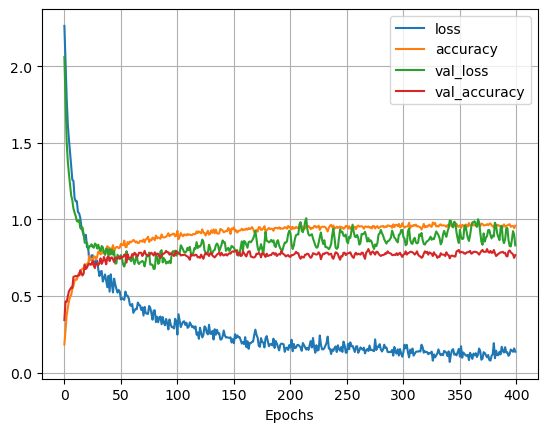

In [42]:
pd.DataFrame(model5_history.history).plot()
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)
plt.show()

## Model 5 Evaluation

In [43]:
model5.evaluate(X_test_scale, y_test)

11/11 [==============================] - 0s 3ms/step - loss: 0.8300 - accuracy: 0.7667


[0.8300359845161438, 0.7666666507720947]

In [44]:
y_pred = np.argmax(model5.predict(X_test_scale),axis=1)

macro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'macro')
print(f"Macro-Averaged Precision score: {round(macro_averaged_precision, 4)}")

micro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged Precision score: {round(micro_averaged_precision, 4)}")

macro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'macro')
print(f"Macro-averaged recall score: {round(macro_averaged_recall, 4)}")

micro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged recall score: {round(micro_averaged_recall, 4)}")

macro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'macro')
print(f"Macro-Averaged F1 score: {round(macro_averaged_f1, 4)}")

micro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged F1 score: {round(micro_averaged_f1, 4)}")

11/11 [==============================] - 0s 2ms/step
Macro-Averaged Precision score: 0.7754
Micro-Averaged Precision score: 0.7667
Macro-averaged recall score: 0.7634
Micro-Averaged recall score: 0.7667
Macro-Averaged F1 score: 0.7631
Micro-Averaged F1 score: 0.7667


# Larger Dataset

In [45]:
df2 = pd.read_csv("Data/features_3_sec.csv")
df2.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [47]:
df2.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


## Splitting the dataset

In [48]:
X = df2.loc[:, 'chroma_stft_mean':'mfcc20_var']

y = df2['label']

In [49]:
le = LabelEncoder()

y = le.fit_transform(y)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Data Scaling

In [51]:
sc.fit(X_train) #Create mould
X_train_scale = sc.transform(X_train)
X_test_scale = sc.transform(X_test)

# Model 3
## Model 3 Training

In [52]:
model3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(X_train_scale.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax"),
])

## Compilation

In [53]:
model3.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## Model 3 Fitting

In [54]:
model3_history = model3.fit(X_train_scale, y_train, validation_data=(X_test_scale, y_test), epochs=500, batch_size=128)

Epoch 1/500
53/53 [==============================] - 1s 15ms/step - loss: 1.9630 - accuracy: 0.2766 - val_loss: 1.4640 - val_accuracy: 0.4810
Epoch 2/500
53/53 [==============================] - 1s 10ms/step - loss: 1.5744 - accuracy: 0.4443 - val_loss: 1.1850 - val_accuracy: 0.5984
Epoch 3/500
53/53 [==============================] - 1s 10ms/step - loss: 1.3843 - accuracy: 0.5229 - val_loss: 1.0317 - val_accuracy: 0.6482
Epoch 4/500
53/53 [==============================] - 1s 10ms/step - loss: 1.2650 - accuracy: 0.5589 - val_loss: 0.9370 - val_accuracy: 0.6958
Epoch 5/500
53/53 [==============================] - 1s 10ms/step - loss: 1.2034 - accuracy: 0.5872 - val_loss: 0.8461 - val_accuracy: 0.7182
Epoch 6/500
53/53 [==============================] - 1s 10ms/step - loss: 1.1281 - accuracy: 0.6238 - val_loss: 0.8195 - val_accuracy: 0.7364
Epoch 7/500
53/53 [==============================] - 1s 10ms/step - loss: 1.0800 - accuracy: 0.6366 - val_loss: 0.7665 - val_accuracy: 0.7489
Epoch 

53/53 [==============================] - 1s 10ms/step - loss: 0.4394 - accuracy: 0.8579 - val_loss: 0.3179 - val_accuracy: 0.8999
Epoch 59/500
53/53 [==============================] - 1s 9ms/step - loss: 0.4487 - accuracy: 0.8543 - val_loss: 0.3084 - val_accuracy: 0.9026
Epoch 60/500
53/53 [==============================] - 1s 10ms/step - loss: 0.4342 - accuracy: 0.8640 - val_loss: 0.3074 - val_accuracy: 0.9048
Epoch 61/500
53/53 [==============================] - 1s 10ms/step - loss: 0.4591 - accuracy: 0.8546 - val_loss: 0.2895 - val_accuracy: 0.9102
Epoch 62/500
53/53 [==============================] - 1s 10ms/step - loss: 0.4314 - accuracy: 0.8642 - val_loss: 0.3035 - val_accuracy: 0.9078
Epoch 63/500
53/53 [==============================] - 1s 10ms/step - loss: 0.4534 - accuracy: 0.8594 - val_loss: 0.3038 - val_accuracy: 0.9039
Epoch 64/500
53/53 [==============================] - 0s 9ms/step - loss: 0.4391 - accuracy: 0.8646 - val_loss: 0.3038 - val_accuracy: 0.9057
Epoch 65/500
5

53/53 [==============================] - 0s 9ms/step - loss: 0.3297 - accuracy: 0.8978 - val_loss: 0.2630 - val_accuracy: 0.9230
Epoch 116/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3424 - accuracy: 0.8923 - val_loss: 0.2573 - val_accuracy: 0.9263
Epoch 117/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3394 - accuracy: 0.8963 - val_loss: 0.2415 - val_accuracy: 0.9293
Epoch 118/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3367 - accuracy: 0.8942 - val_loss: 0.2531 - val_accuracy: 0.9272
Epoch 119/500
53/53 [==============================] - 1s 10ms/step - loss: 0.3263 - accuracy: 0.8981 - val_loss: 0.2683 - val_accuracy: 0.9217
Epoch 120/500
53/53 [==============================] - 1s 10ms/step - loss: 0.3241 - accuracy: 0.9006 - val_loss: 0.2639 - val_accuracy: 0.9227
Epoch 121/500
53/53 [==============================] - 1s 9ms/step - loss: 0.3302 - accuracy: 0.8944 - val_loss: 0.2614 - val_accuracy: 0.9227
Epoch 122/5

53/53 [==============================] - 0s 9ms/step - loss: 0.2736 - accuracy: 0.9165 - val_loss: 0.2392 - val_accuracy: 0.9302
Epoch 173/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2659 - accuracy: 0.9181 - val_loss: 0.2435 - val_accuracy: 0.9278
Epoch 174/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2686 - accuracy: 0.9214 - val_loss: 0.2480 - val_accuracy: 0.9287
Epoch 175/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2861 - accuracy: 0.9108 - val_loss: 0.2427 - val_accuracy: 0.9308
Epoch 176/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2711 - accuracy: 0.9171 - val_loss: 0.2362 - val_accuracy: 0.9311
Epoch 177/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2714 - accuracy: 0.9184 - val_loss: 0.2551 - val_accuracy: 0.9263
Epoch 178/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2525 - accuracy: 0.9204 - val_loss: 0.2511 - val_accuracy: 0.9293
Epoch 179/500

53/53 [==============================] - 0s 9ms/step - loss: 0.2495 - accuracy: 0.9234 - val_loss: 0.2317 - val_accuracy: 0.9333
Epoch 230/500
53/53 [==============================] - 1s 9ms/step - loss: 0.2394 - accuracy: 0.9251 - val_loss: 0.2398 - val_accuracy: 0.9336
Epoch 231/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2451 - accuracy: 0.9281 - val_loss: 0.2450 - val_accuracy: 0.9302
Epoch 232/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2369 - accuracy: 0.9229 - val_loss: 0.2381 - val_accuracy: 0.9354
Epoch 233/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2373 - accuracy: 0.9299 - val_loss: 0.2422 - val_accuracy: 0.9360
Epoch 234/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2245 - accuracy: 0.9266 - val_loss: 0.2435 - val_accuracy: 0.9348
Epoch 235/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2362 - accuracy: 0.9260 - val_loss: 0.2386 - val_accuracy: 0.9369
Epoch 236/500

53/53 [==============================] - 1s 10ms/step - loss: 0.2169 - accuracy: 0.9326 - val_loss: 0.2336 - val_accuracy: 0.9372
Epoch 287/500
53/53 [==============================] - 1s 10ms/step - loss: 0.2092 - accuracy: 0.9305 - val_loss: 0.2258 - val_accuracy: 0.9372
Epoch 288/500
53/53 [==============================] - 1s 10ms/step - loss: 0.2228 - accuracy: 0.9314 - val_loss: 0.2513 - val_accuracy: 0.9348
Epoch 289/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2291 - accuracy: 0.9254 - val_loss: 0.2384 - val_accuracy: 0.9354
Epoch 290/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2276 - accuracy: 0.9310 - val_loss: 0.2281 - val_accuracy: 0.9372
Epoch 291/500
53/53 [==============================] - 1s 10ms/step - loss: 0.2213 - accuracy: 0.9287 - val_loss: 0.2341 - val_accuracy: 0.9369
Epoch 292/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2382 - accuracy: 0.9292 - val_loss: 0.2073 - val_accuracy: 0.9402
Epoch 293

53/53 [==============================] - 0s 9ms/step - loss: 0.2128 - accuracy: 0.9347 - val_loss: 0.2332 - val_accuracy: 0.9342
Epoch 344/500
53/53 [==============================] - 1s 10ms/step - loss: 0.2084 - accuracy: 0.9349 - val_loss: 0.2212 - val_accuracy: 0.9357
Epoch 345/500
53/53 [==============================] - 1s 10ms/step - loss: 0.1924 - accuracy: 0.9398 - val_loss: 0.2370 - val_accuracy: 0.9327
Epoch 346/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2096 - accuracy: 0.9341 - val_loss: 0.2357 - val_accuracy: 0.9339
Epoch 347/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2169 - accuracy: 0.9305 - val_loss: 0.2409 - val_accuracy: 0.9357
Epoch 348/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2165 - accuracy: 0.9337 - val_loss: 0.2154 - val_accuracy: 0.9375
Epoch 349/500
53/53 [==============================] - 1s 10ms/step - loss: 0.2041 - accuracy: 0.9372 - val_loss: 0.2210 - val_accuracy: 0.9393
Epoch 350/

53/53 [==============================] - 0s 9ms/step - loss: 0.1850 - accuracy: 0.9432 - val_loss: 0.2261 - val_accuracy: 0.9396
Epoch 401/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1879 - accuracy: 0.9414 - val_loss: 0.2395 - val_accuracy: 0.9348
Epoch 402/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1837 - accuracy: 0.9438 - val_loss: 0.2142 - val_accuracy: 0.9396
Epoch 403/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1890 - accuracy: 0.9378 - val_loss: 0.2216 - val_accuracy: 0.9430
Epoch 404/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2062 - accuracy: 0.9405 - val_loss: 0.2360 - val_accuracy: 0.9351
Epoch 405/500
53/53 [==============================] - 1s 10ms/step - loss: 0.1890 - accuracy: 0.9411 - val_loss: 0.2478 - val_accuracy: 0.9342
Epoch 406/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2094 - accuracy: 0.9374 - val_loss: 0.2379 - val_accuracy: 0.9327
Epoch 407/50

53/53 [==============================] - 0s 9ms/step - loss: 0.1732 - accuracy: 0.9432 - val_loss: 0.2417 - val_accuracy: 0.9363
Epoch 458/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1748 - accuracy: 0.9482 - val_loss: 0.2560 - val_accuracy: 0.9351
Epoch 459/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1795 - accuracy: 0.9449 - val_loss: 0.2411 - val_accuracy: 0.9357
Epoch 460/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1695 - accuracy: 0.9459 - val_loss: 0.2432 - val_accuracy: 0.9360
Epoch 461/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1760 - accuracy: 0.9465 - val_loss: 0.2315 - val_accuracy: 0.9399
Epoch 462/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1868 - accuracy: 0.9425 - val_loss: 0.2465 - val_accuracy: 0.9384
Epoch 463/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1741 - accuracy: 0.9437 - val_loss: 0.2498 - val_accuracy: 0.9378
Epoch 464/500

## Model 3 Validation

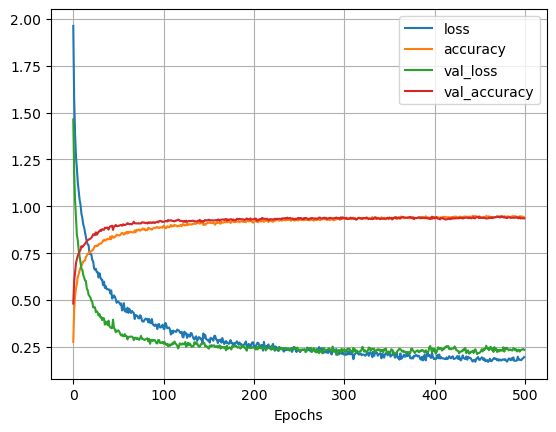

In [55]:
pd.DataFrame(model3_history.history).plot()
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)
plt.show()

## Model 3 Evaluation

In [56]:
model3.evaluate(X_test_scale, y_test)

104/104 [==============================] - 0s 2ms/step - loss: 0.2340 - accuracy: 0.9357


[0.2340395450592041, 0.9356991052627563]

In [57]:
y_pred = np.argmax(model3.predict(X_test_scale),axis=1)

macro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'macro')
print(f"Macro-Averaged Precision score: {round(macro_averaged_precision, 4)}")

micro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged Precision score: {round(micro_averaged_precision, 4)}")

macro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'macro')
print(f"Macro-averaged recall score: {round(macro_averaged_recall, 4)}")

micro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged recall score: {round(micro_averaged_recall, 4)}")

macro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'macro')
print(f"Macro-Averaged F1 score: {round(macro_averaged_f1, 4)}")

micro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged F1 score: {round(micro_averaged_f1, 4)}")

104/104 [==============================] - 0s 2ms/step
Macro-Averaged Precision score: 0.9363
Micro-Averaged Precision score: 0.9357
Macro-averaged recall score: 0.9358
Micro-Averaged recall score: 0.9357
Macro-Averaged F1 score: 0.9357
Micro-Averaged F1 score: 0.9357


# Model 4
## Model 4 Training

In [58]:
model4 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(X_train_scale.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax"),
])

## Compilation

In [59]:
model4.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## Model 4 Fitting

In [60]:
model4_history = model4.fit(X_train_scale, y_train, validation_data=(X_test_scale, y_test), epochs=500, batch_size=128)

Epoch 1/500
53/53 [==============================] - 2s 17ms/step - loss: 2.0997 - accuracy: 0.2219 - val_loss: 1.7326 - val_accuracy: 0.3631
Epoch 2/500
53/53 [==============================] - 1s 10ms/step - loss: 1.7756 - accuracy: 0.3550 - val_loss: 1.4188 - val_accuracy: 0.5026
Epoch 3/500
53/53 [==============================] - 1s 11ms/step - loss: 1.6156 - accuracy: 0.4207 - val_loss: 1.2838 - val_accuracy: 0.5414
Epoch 4/500
53/53 [==============================] - 1s 11ms/step - loss: 1.5184 - accuracy: 0.4656 - val_loss: 1.2116 - val_accuracy: 0.5657
Epoch 5/500
53/53 [==============================] - 1s 11ms/step - loss: 1.4519 - accuracy: 0.4944 - val_loss: 1.1284 - val_accuracy: 0.6224
Epoch 6/500
53/53 [==============================] - 1s 10ms/step - loss: 1.3564 - accuracy: 0.5298 - val_loss: 1.0567 - val_accuracy: 0.6354
Epoch 7/500
53/53 [==============================] - 1s 10ms/step - loss: 1.3061 - accuracy: 0.5415 - val_loss: 0.9933 - val_accuracy: 0.6697
Epoch 

53/53 [==============================] - 1s 11ms/step - loss: 0.5863 - accuracy: 0.8301 - val_loss: 0.3782 - val_accuracy: 0.8893
Epoch 59/500
53/53 [==============================] - 1s 11ms/step - loss: 0.5845 - accuracy: 0.8207 - val_loss: 0.3763 - val_accuracy: 0.8850
Epoch 60/500
53/53 [==============================] - 1s 11ms/step - loss: 0.6126 - accuracy: 0.8280 - val_loss: 0.4169 - val_accuracy: 0.8814
Epoch 61/500
53/53 [==============================] - 1s 11ms/step - loss: 0.6078 - accuracy: 0.8185 - val_loss: 0.4146 - val_accuracy: 0.8784
Epoch 62/500
53/53 [==============================] - 1s 11ms/step - loss: 0.5863 - accuracy: 0.8285 - val_loss: 0.3740 - val_accuracy: 0.8914
Epoch 63/500
53/53 [==============================] - 1s 11ms/step - loss: 0.5775 - accuracy: 0.8256 - val_loss: 0.3657 - val_accuracy: 0.8926
Epoch 64/500
53/53 [==============================] - 1s 11ms/step - loss: 0.5821 - accuracy: 0.8250 - val_loss: 0.3802 - val_accuracy: 0.8869
Epoch 65/500

53/53 [==============================] - 1s 10ms/step - loss: 0.4734 - accuracy: 0.8654 - val_loss: 0.2937 - val_accuracy: 0.9184
Epoch 116/500
53/53 [==============================] - 1s 10ms/step - loss: 0.4420 - accuracy: 0.8751 - val_loss: 0.3082 - val_accuracy: 0.9126
Epoch 117/500
53/53 [==============================] - 1s 10ms/step - loss: 0.4499 - accuracy: 0.8806 - val_loss: 0.3045 - val_accuracy: 0.9169
Epoch 118/500
53/53 [==============================] - 1s 10ms/step - loss: 0.4427 - accuracy: 0.8732 - val_loss: 0.3253 - val_accuracy: 0.9148
Epoch 119/500
53/53 [==============================] - 1s 10ms/step - loss: 0.4360 - accuracy: 0.8763 - val_loss: 0.3206 - val_accuracy: 0.9160
Epoch 120/500
53/53 [==============================] - 1s 10ms/step - loss: 0.4354 - accuracy: 0.8809 - val_loss: 0.2814 - val_accuracy: 0.9196
Epoch 121/500
53/53 [==============================] - 1s 10ms/step - loss: 0.4404 - accuracy: 0.8761 - val_loss: 0.2883 - val_accuracy: 0.9248
Epoch 

53/53 [==============================] - 0s 9ms/step - loss: 0.3783 - accuracy: 0.8951 - val_loss: 0.3195 - val_accuracy: 0.9205
Epoch 173/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3869 - accuracy: 0.8903 - val_loss: 0.2907 - val_accuracy: 0.9230
Epoch 174/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3631 - accuracy: 0.8945 - val_loss: 0.3171 - val_accuracy: 0.9169
Epoch 175/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3822 - accuracy: 0.8906 - val_loss: 0.2963 - val_accuracy: 0.9202
Epoch 176/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3892 - accuracy: 0.8924 - val_loss: 0.2946 - val_accuracy: 0.9208
Epoch 177/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3917 - accuracy: 0.8848 - val_loss: 0.2942 - val_accuracy: 0.9254
Epoch 178/500
53/53 [==============================] - 1s 10ms/step - loss: 0.3649 - accuracy: 0.8959 - val_loss: 0.2814 - val_accuracy: 0.9257
Epoch 179/50

53/53 [==============================] - 0s 9ms/step - loss: 0.3419 - accuracy: 0.9054 - val_loss: 0.2745 - val_accuracy: 0.9251
Epoch 230/500
53/53 [==============================] - 1s 10ms/step - loss: 0.3450 - accuracy: 0.9033 - val_loss: 0.2712 - val_accuracy: 0.9251
Epoch 231/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3362 - accuracy: 0.9027 - val_loss: 0.2736 - val_accuracy: 0.9311
Epoch 232/500
53/53 [==============================] - 1s 10ms/step - loss: 0.3270 - accuracy: 0.9086 - val_loss: 0.2721 - val_accuracy: 0.9293
Epoch 233/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3268 - accuracy: 0.9089 - val_loss: 0.2746 - val_accuracy: 0.9275
Epoch 234/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3333 - accuracy: 0.9062 - val_loss: 0.2754 - val_accuracy: 0.9287
Epoch 235/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3344 - accuracy: 0.9093 - val_loss: 0.2781 - val_accuracy: 0.9266
Epoch 236/5

53/53 [==============================] - 0s 9ms/step - loss: 0.3139 - accuracy: 0.9148 - val_loss: 0.2803 - val_accuracy: 0.9315
Epoch 287/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3216 - accuracy: 0.9063 - val_loss: 0.2690 - val_accuracy: 0.9324
Epoch 288/500
53/53 [==============================] - 1s 10ms/step - loss: 0.3128 - accuracy: 0.9145 - val_loss: 0.2660 - val_accuracy: 0.9299
Epoch 289/500
53/53 [==============================] - 1s 10ms/step - loss: 0.3040 - accuracy: 0.9169 - val_loss: 0.2924 - val_accuracy: 0.9305
Epoch 290/500
53/53 [==============================] - 1s 10ms/step - loss: 0.3151 - accuracy: 0.9075 - val_loss: 0.2621 - val_accuracy: 0.9308
Epoch 291/500
53/53 [==============================] - 1s 10ms/step - loss: 0.2909 - accuracy: 0.9202 - val_loss: 0.2754 - val_accuracy: 0.9348
Epoch 292/500
53/53 [==============================] - 1s 10ms/step - loss: 0.3144 - accuracy: 0.9138 - val_loss: 0.2603 - val_accuracy: 0.9351
Epoch 29

53/53 [==============================] - 0s 9ms/step - loss: 0.2808 - accuracy: 0.9151 - val_loss: 0.2790 - val_accuracy: 0.9354
Epoch 344/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2816 - accuracy: 0.9195 - val_loss: 0.2862 - val_accuracy: 0.9345
Epoch 345/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2942 - accuracy: 0.9148 - val_loss: 0.2703 - val_accuracy: 0.9333
Epoch 346/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3037 - accuracy: 0.9172 - val_loss: 0.2598 - val_accuracy: 0.9348
Epoch 347/500
53/53 [==============================] - 1s 10ms/step - loss: 0.2831 - accuracy: 0.9196 - val_loss: 0.2800 - val_accuracy: 0.9381
Epoch 348/500
53/53 [==============================] - 1s 10ms/step - loss: 0.2910 - accuracy: 0.9148 - val_loss: 0.2694 - val_accuracy: 0.9363
Epoch 349/500
53/53 [==============================] - 1s 10ms/step - loss: 0.2753 - accuracy: 0.9241 - val_loss: 0.2792 - val_accuracy: 0.9290
Epoch 350/

53/53 [==============================] - 1s 11ms/step - loss: 0.2957 - accuracy: 0.9190 - val_loss: 0.2805 - val_accuracy: 0.9302
Epoch 401/500
53/53 [==============================] - 1s 10ms/step - loss: 0.2785 - accuracy: 0.9225 - val_loss: 0.2863 - val_accuracy: 0.9342
Epoch 402/500
53/53 [==============================] - 1s 10ms/step - loss: 0.2729 - accuracy: 0.9247 - val_loss: 0.2746 - val_accuracy: 0.9351
Epoch 403/500
53/53 [==============================] - 1s 10ms/step - loss: 0.2868 - accuracy: 0.9217 - val_loss: 0.2714 - val_accuracy: 0.9363
Epoch 404/500
53/53 [==============================] - 1s 10ms/step - loss: 0.2614 - accuracy: 0.9257 - val_loss: 0.2678 - val_accuracy: 0.9393
Epoch 405/500
53/53 [==============================] - 1s 9ms/step - loss: 0.2687 - accuracy: 0.9216 - val_loss: 0.2984 - val_accuracy: 0.9354
Epoch 406/500
53/53 [==============================] - 1s 10ms/step - loss: 0.2769 - accuracy: 0.9247 - val_loss: 0.2894 - val_accuracy: 0.9351
Epoch 4

53/53 [==============================] - 1s 10ms/step - loss: 0.2627 - accuracy: 0.9240 - val_loss: 0.2681 - val_accuracy: 0.9381
Epoch 458/500
53/53 [==============================] - 1s 10ms/step - loss: 0.2562 - accuracy: 0.9271 - val_loss: 0.2622 - val_accuracy: 0.9360
Epoch 459/500
53/53 [==============================] - 1s 10ms/step - loss: 0.2428 - accuracy: 0.9311 - val_loss: 0.2591 - val_accuracy: 0.9366
Epoch 460/500
53/53 [==============================] - 1s 10ms/step - loss: 0.2555 - accuracy: 0.9271 - val_loss: 0.2711 - val_accuracy: 0.9393
Epoch 461/500
53/53 [==============================] - 1s 10ms/step - loss: 0.2671 - accuracy: 0.9268 - val_loss: 0.2686 - val_accuracy: 0.9363
Epoch 462/500
53/53 [==============================] - 1s 10ms/step - loss: 0.2656 - accuracy: 0.9257 - val_loss: 0.2508 - val_accuracy: 0.9396
Epoch 463/500
53/53 [==============================] - 1s 10ms/step - loss: 0.2545 - accuracy: 0.9250 - val_loss: 0.2671 - val_accuracy: 0.9409
Epoch 

## Model 4 Validation

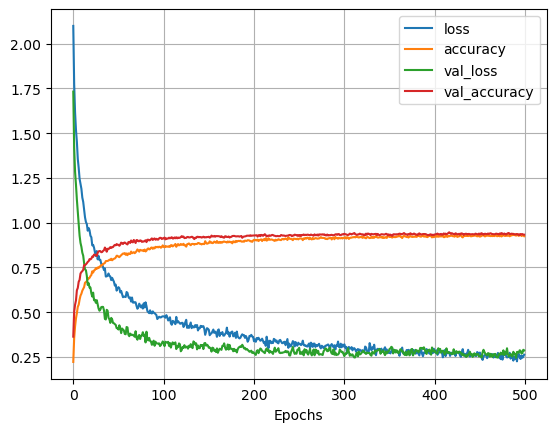

In [61]:
pd.DataFrame(model4_history.history).plot()
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)
plt.show()

## Model 4 Evaluation

In [62]:
model4.evaluate(X_test_scale, y_test)

104/104 [==============================] - 0s 2ms/step - loss: 0.2864 - accuracy: 0.9330


[0.2864230275154114, 0.9329693913459778]

In [63]:
y_pred = np.argmax(model4.predict(X_test_scale),axis=1)

macro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'macro')
print(f"Macro-Averaged Precision score: {round(macro_averaged_precision, 4)}")

micro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged Precision score: {round(micro_averaged_precision, 4)}")

macro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'macro')
print(f"Macro-averaged recall score: {round(macro_averaged_recall, 4)}")

micro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged recall score: {round(micro_averaged_recall, 4)}")

macro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'macro')
print(f"Macro-Averaged F1 score: {round(macro_averaged_f1, 4)}")

micro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged F1 score: {round(micro_averaged_f1, 4)}")

104/104 [==============================] - 0s 2ms/step
Macro-Averaged Precision score: 0.9334
Micro-Averaged Precision score: 0.933
Macro-averaged recall score: 0.9328
Micro-Averaged recall score: 0.933
Macro-Averaged F1 score: 0.9328
Micro-Averaged F1 score: 0.933


# Model 5
## Model 5 Training

In [64]:
model5 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(X_train_scale.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax"),
])

## Compilation

In [65]:
model5.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## Model 5 Fitting

In [66]:
model5_history = model5.fit(X_train_scale, y_train, validation_data=(X_test_scale, y_test), epochs=500, batch_size=128)

Epoch 1/500
53/53 [==============================] - 1s 14ms/step - loss: 1.7285 - accuracy: 0.3705 - val_loss: 1.2554 - val_accuracy: 0.5566
Epoch 2/500
53/53 [==============================] - 0s 9ms/step - loss: 1.3247 - accuracy: 0.5265 - val_loss: 0.9996 - val_accuracy: 0.6582
Epoch 3/500
53/53 [==============================] - 0s 9ms/step - loss: 1.1645 - accuracy: 0.5902 - val_loss: 0.8875 - val_accuracy: 0.7100
Epoch 4/500
53/53 [==============================] - 1s 10ms/step - loss: 1.0824 - accuracy: 0.6241 - val_loss: 0.8388 - val_accuracy: 0.7064
Epoch 5/500
53/53 [==============================] - 0s 9ms/step - loss: 0.9987 - accuracy: 0.6567 - val_loss: 0.7554 - val_accuracy: 0.7452
Epoch 6/500
53/53 [==============================] - 0s 9ms/step - loss: 0.9676 - accuracy: 0.6613 - val_loss: 0.7516 - val_accuracy: 0.7382
Epoch 7/500
53/53 [==============================] - 1s 9ms/step - loss: 0.9324 - accuracy: 0.6791 - val_loss: 0.6973 - val_accuracy: 0.7637
Epoch 8/500

53/53 [==============================] - 0s 9ms/step - loss: 0.3929 - accuracy: 0.8673 - val_loss: 0.2988 - val_accuracy: 0.9023
Epoch 59/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3864 - accuracy: 0.8711 - val_loss: 0.3080 - val_accuracy: 0.9087
Epoch 60/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3882 - accuracy: 0.8703 - val_loss: 0.2847 - val_accuracy: 0.9108
Epoch 61/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3772 - accuracy: 0.8772 - val_loss: 0.2945 - val_accuracy: 0.9090
Epoch 62/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3631 - accuracy: 0.8773 - val_loss: 0.2886 - val_accuracy: 0.9111
Epoch 63/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3777 - accuracy: 0.8724 - val_loss: 0.2792 - val_accuracy: 0.9111
Epoch 64/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3521 - accuracy: 0.8803 - val_loss: 0.2696 - val_accuracy: 0.9136
Epoch 65/500
53/53 

53/53 [==============================] - 0s 9ms/step - loss: 0.2759 - accuracy: 0.9047 - val_loss: 0.2325 - val_accuracy: 0.9311
Epoch 116/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2693 - accuracy: 0.9092 - val_loss: 0.2369 - val_accuracy: 0.9305
Epoch 117/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2723 - accuracy: 0.9105 - val_loss: 0.2376 - val_accuracy: 0.9321
Epoch 118/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2767 - accuracy: 0.9101 - val_loss: 0.2343 - val_accuracy: 0.9266
Epoch 119/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2786 - accuracy: 0.9072 - val_loss: 0.2308 - val_accuracy: 0.9260
Epoch 120/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2693 - accuracy: 0.9139 - val_loss: 0.2344 - val_accuracy: 0.9272
Epoch 121/500
53/53 [==============================] - 0s 8ms/step - loss: 0.2861 - accuracy: 0.9038 - val_loss: 0.2278 - val_accuracy: 0.9333
Epoch 122/500

53/53 [==============================] - 0s 9ms/step - loss: 0.2170 - accuracy: 0.9278 - val_loss: 0.2277 - val_accuracy: 0.9339
Epoch 173/500
53/53 [==============================] - 0s 8ms/step - loss: 0.2374 - accuracy: 0.9237 - val_loss: 0.2110 - val_accuracy: 0.9369
Epoch 174/500
53/53 [==============================] - 0s 8ms/step - loss: 0.2261 - accuracy: 0.9226 - val_loss: 0.2238 - val_accuracy: 0.9308
Epoch 175/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2238 - accuracy: 0.9257 - val_loss: 0.2178 - val_accuracy: 0.9321
Epoch 176/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2154 - accuracy: 0.9248 - val_loss: 0.2193 - val_accuracy: 0.9354
Epoch 177/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2331 - accuracy: 0.9198 - val_loss: 0.2186 - val_accuracy: 0.9321
Epoch 178/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2224 - accuracy: 0.9231 - val_loss: 0.2331 - val_accuracy: 0.9299
Epoch 179/500

53/53 [==============================] - 0s 9ms/step - loss: 0.1952 - accuracy: 0.9371 - val_loss: 0.2251 - val_accuracy: 0.9354
Epoch 230/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2057 - accuracy: 0.9329 - val_loss: 0.2155 - val_accuracy: 0.9402
Epoch 231/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1906 - accuracy: 0.9372 - val_loss: 0.2148 - val_accuracy: 0.9375
Epoch 232/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2070 - accuracy: 0.9346 - val_loss: 0.2110 - val_accuracy: 0.9378
Epoch 233/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1915 - accuracy: 0.9349 - val_loss: 0.2225 - val_accuracy: 0.9406
Epoch 234/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1998 - accuracy: 0.9352 - val_loss: 0.2068 - val_accuracy: 0.9406
Epoch 235/500
53/53 [==============================] - 0s 9ms/step - loss: 0.2007 - accuracy: 0.9364 - val_loss: 0.2078 - val_accuracy: 0.9402
Epoch 236/500

53/53 [==============================] - 0s 9ms/step - loss: 0.1799 - accuracy: 0.9384 - val_loss: 0.2349 - val_accuracy: 0.9357
Epoch 287/500
53/53 [==============================] - 1s 10ms/step - loss: 0.1990 - accuracy: 0.9364 - val_loss: 0.2239 - val_accuracy: 0.9357
Epoch 288/500
53/53 [==============================] - 1s 10ms/step - loss: 0.1883 - accuracy: 0.9350 - val_loss: 0.2279 - val_accuracy: 0.9330
Epoch 289/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1733 - accuracy: 0.9407 - val_loss: 0.2299 - val_accuracy: 0.9366
Epoch 290/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1953 - accuracy: 0.9343 - val_loss: 0.2300 - val_accuracy: 0.9381
Epoch 291/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1813 - accuracy: 0.9350 - val_loss: 0.2336 - val_accuracy: 0.9315
Epoch 292/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1844 - accuracy: 0.9404 - val_loss: 0.2256 - val_accuracy: 0.9369
Epoch 293/5

53/53 [==============================] - 0s 8ms/step - loss: 0.1699 - accuracy: 0.9444 - val_loss: 0.2219 - val_accuracy: 0.9396
Epoch 344/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1659 - accuracy: 0.9429 - val_loss: 0.2232 - val_accuracy: 0.9402
Epoch 345/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1851 - accuracy: 0.9390 - val_loss: 0.2174 - val_accuracy: 0.9369
Epoch 346/500
53/53 [==============================] - 0s 8ms/step - loss: 0.1791 - accuracy: 0.9452 - val_loss: 0.2257 - val_accuracy: 0.9378
Epoch 347/500
53/53 [==============================] - 0s 8ms/step - loss: 0.1754 - accuracy: 0.9431 - val_loss: 0.2160 - val_accuracy: 0.9396
Epoch 348/500
53/53 [==============================] - 0s 8ms/step - loss: 0.1621 - accuracy: 0.9447 - val_loss: 0.2150 - val_accuracy: 0.9409
Epoch 349/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1609 - accuracy: 0.9495 - val_loss: 0.2234 - val_accuracy: 0.9406
Epoch 350/500

53/53 [==============================] - 0s 9ms/step - loss: 0.1649 - accuracy: 0.9462 - val_loss: 0.2166 - val_accuracy: 0.9399
Epoch 401/500
53/53 [==============================] - 0s 8ms/step - loss: 0.1626 - accuracy: 0.9470 - val_loss: 0.2149 - val_accuracy: 0.9415
Epoch 402/500
53/53 [==============================] - 0s 8ms/step - loss: 0.1793 - accuracy: 0.9447 - val_loss: 0.2199 - val_accuracy: 0.9378
Epoch 403/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1700 - accuracy: 0.9473 - val_loss: 0.2173 - val_accuracy: 0.9399
Epoch 404/500
53/53 [==============================] - 0s 8ms/step - loss: 0.1610 - accuracy: 0.9501 - val_loss: 0.2119 - val_accuracy: 0.9375
Epoch 405/500
53/53 [==============================] - 0s 8ms/step - loss: 0.1611 - accuracy: 0.9479 - val_loss: 0.2156 - val_accuracy: 0.9375
Epoch 406/500
53/53 [==============================] - 0s 8ms/step - loss: 0.1483 - accuracy: 0.9505 - val_loss: 0.2164 - val_accuracy: 0.9381
Epoch 407/500

53/53 [==============================] - 0s 9ms/step - loss: 0.1501 - accuracy: 0.9519 - val_loss: 0.2330 - val_accuracy: 0.9357
Epoch 458/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1660 - accuracy: 0.9480 - val_loss: 0.2266 - val_accuracy: 0.9366
Epoch 459/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1450 - accuracy: 0.9519 - val_loss: 0.2266 - val_accuracy: 0.9363
Epoch 460/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1543 - accuracy: 0.9502 - val_loss: 0.2193 - val_accuracy: 0.9399
Epoch 461/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1425 - accuracy: 0.9553 - val_loss: 0.2334 - val_accuracy: 0.9409
Epoch 462/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1501 - accuracy: 0.9519 - val_loss: 0.2317 - val_accuracy: 0.9375
Epoch 463/500
53/53 [==============================] - 0s 8ms/step - loss: 0.1621 - accuracy: 0.9470 - val_loss: 0.2203 - val_accuracy: 0.9366
Epoch 464/500

## Model 5 Validation

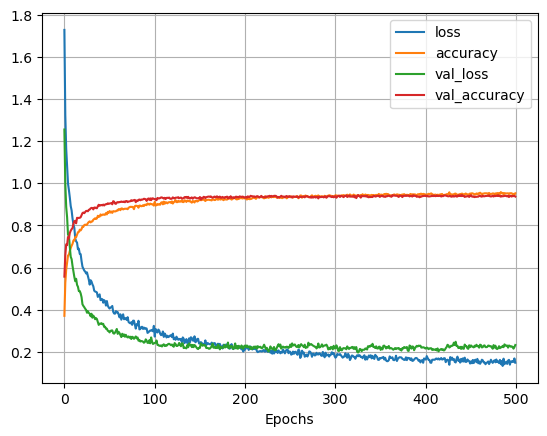

In [67]:
pd.DataFrame(model5_history.history).plot()
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)
plt.show()

## Model 5 Evaluation

In [68]:
model5.evaluate(X_test_scale, y_test)

104/104 [==============================] - 0s 3ms/step - loss: 0.2318 - accuracy: 0.9369


[0.23178692162036896, 0.9369123578071594]

In [69]:
y_pred = np.argmax(model5.predict(X_test_scale),axis=1)

macro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'macro')
print(f"Macro-Averaged Precision score: {round(macro_averaged_precision, 4)}")

micro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged Precision score: {round(micro_averaged_precision, 4)}")

macro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'macro')
print(f"Macro-averaged recall score: {round(macro_averaged_recall, 4)}")

micro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged recall score: {round(micro_averaged_recall, 4)}")

macro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'macro')
print(f"Macro-Averaged F1 score: {round(macro_averaged_f1, 4)}")

micro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged F1 score: {round(micro_averaged_f1, 4)}")

104/104 [==============================] - 0s 2ms/step
Macro-Averaged Precision score: 0.9372
Micro-Averaged Precision score: 0.9369
Macro-averaged recall score: 0.937
Micro-Averaged recall score: 0.9369
Macro-Averaged F1 score: 0.9369
Micro-Averaged F1 score: 0.9369


# Model 6
## Model 6 Training

In [70]:
model6 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(X_train_scale.shape[1],)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation="softmax"),
])

## Compilation

In [71]:
model6.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## Model 6 Fitting

In [72]:
model6_history = model6.fit(X_train_scale, y_train, validation_data=(X_test_scale, y_test), epochs=500, batch_size=128)

Epoch 1/500
53/53 [==============================] - 2s 15ms/step - loss: 1.5580 - accuracy: 0.4430 - val_loss: 1.0319 - val_accuracy: 0.6315
Epoch 2/500
53/53 [==============================] - 0s 9ms/step - loss: 1.0654 - accuracy: 0.6253 - val_loss: 0.8533 - val_accuracy: 0.7113
Epoch 3/500
53/53 [==============================] - 1s 10ms/step - loss: 0.9056 - accuracy: 0.6901 - val_loss: 0.7819 - val_accuracy: 0.7298
Epoch 4/500
53/53 [==============================] - 0s 9ms/step - loss: 0.8028 - accuracy: 0.7194 - val_loss: 0.6613 - val_accuracy: 0.7777
Epoch 5/500
53/53 [==============================] - 1s 10ms/step - loss: 0.7354 - accuracy: 0.7424 - val_loss: 0.6121 - val_accuracy: 0.7956
Epoch 6/500
53/53 [==============================] - 1s 9ms/step - loss: 0.6632 - accuracy: 0.7751 - val_loss: 0.5437 - val_accuracy: 0.8214
Epoch 7/500
53/53 [==============================] - 1s 11ms/step - loss: 0.6128 - accuracy: 0.7892 - val_loss: 0.5311 - val_accuracy: 0.8289
Epoch 8/5

53/53 [==============================] - 0s 9ms/step - loss: 0.1230 - accuracy: 0.9597 - val_loss: 0.2614 - val_accuracy: 0.9260
Epoch 59/500
53/53 [==============================] - 1s 10ms/step - loss: 0.1297 - accuracy: 0.9567 - val_loss: 0.2656 - val_accuracy: 0.9287
Epoch 60/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1383 - accuracy: 0.9559 - val_loss: 0.2860 - val_accuracy: 0.9175
Epoch 61/500
53/53 [==============================] - 0s 9ms/step - loss: 0.1164 - accuracy: 0.9616 - val_loss: 0.2582 - val_accuracy: 0.9287
Epoch 62/500
53/53 [==============================] - 1s 10ms/step - loss: 0.1334 - accuracy: 0.9564 - val_loss: 0.2899 - val_accuracy: 0.9227
Epoch 63/500
53/53 [==============================] - 1s 10ms/step - loss: 0.1377 - accuracy: 0.9540 - val_loss: 0.2475 - val_accuracy: 0.9302
Epoch 64/500
53/53 [==============================] - 1s 10ms/step - loss: 0.1322 - accuracy: 0.9568 - val_loss: 0.2626 - val_accuracy: 0.9260
Epoch 65/500
53

53/53 [==============================] - 0s 9ms/step - loss: 0.0986 - accuracy: 0.9682 - val_loss: 0.2643 - val_accuracy: 0.9275
Epoch 116/500
53/53 [==============================] - 0s 8ms/step - loss: 0.1075 - accuracy: 0.9671 - val_loss: 0.2522 - val_accuracy: 0.9266
Epoch 117/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0848 - accuracy: 0.9715 - val_loss: 0.2474 - val_accuracy: 0.9324
Epoch 118/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0818 - accuracy: 0.9734 - val_loss: 0.2520 - val_accuracy: 0.9315
Epoch 119/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0827 - accuracy: 0.9730 - val_loss: 0.2582 - val_accuracy: 0.9257
Epoch 120/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0833 - accuracy: 0.9742 - val_loss: 0.2365 - val_accuracy: 0.9351
Epoch 121/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0913 - accuracy: 0.9706 - val_loss: 0.2600 - val_accuracy: 0.9272
Epoch 122/500

53/53 [==============================] - 0s 9ms/step - loss: 0.0751 - accuracy: 0.9753 - val_loss: 0.2846 - val_accuracy: 0.9269
Epoch 173/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0731 - accuracy: 0.9785 - val_loss: 0.2781 - val_accuracy: 0.9284
Epoch 174/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0794 - accuracy: 0.9747 - val_loss: 0.2716 - val_accuracy: 0.9308
Epoch 175/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0702 - accuracy: 0.9762 - val_loss: 0.2546 - val_accuracy: 0.9342
Epoch 176/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0704 - accuracy: 0.9771 - val_loss: 0.2580 - val_accuracy: 0.9342
Epoch 177/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0706 - accuracy: 0.9749 - val_loss: 0.2772 - val_accuracy: 0.9290
Epoch 178/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0602 - accuracy: 0.9798 - val_loss: 0.2851 - val_accuracy: 0.9296
Epoch 179/500

53/53 [==============================] - 0s 9ms/step - loss: 0.0567 - accuracy: 0.9813 - val_loss: 0.2853 - val_accuracy: 0.9315
Epoch 230/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0596 - accuracy: 0.9821 - val_loss: 0.2848 - val_accuracy: 0.9308
Epoch 231/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0567 - accuracy: 0.9797 - val_loss: 0.2864 - val_accuracy: 0.9321
Epoch 232/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0564 - accuracy: 0.9833 - val_loss: 0.2858 - val_accuracy: 0.9302
Epoch 233/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0659 - accuracy: 0.9816 - val_loss: 0.2721 - val_accuracy: 0.9321
Epoch 234/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0716 - accuracy: 0.9782 - val_loss: 0.2872 - val_accuracy: 0.9275
Epoch 235/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0593 - accuracy: 0.9812 - val_loss: 0.2932 - val_accuracy: 0.9281
Epoch 236/500

53/53 [==============================] - 0s 9ms/step - loss: 0.0559 - accuracy: 0.9825 - val_loss: 0.2605 - val_accuracy: 0.9381
Epoch 287/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0561 - accuracy: 0.9839 - val_loss: 0.2722 - val_accuracy: 0.9324
Epoch 288/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0524 - accuracy: 0.9819 - val_loss: 0.2606 - val_accuracy: 0.9287
Epoch 289/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0535 - accuracy: 0.9836 - val_loss: 0.2471 - val_accuracy: 0.9384
Epoch 290/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0550 - accuracy: 0.9830 - val_loss: 0.2760 - val_accuracy: 0.9321
Epoch 291/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0509 - accuracy: 0.9848 - val_loss: 0.2600 - val_accuracy: 0.9333
Epoch 292/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0561 - accuracy: 0.9821 - val_loss: 0.2514 - val_accuracy: 0.9345
Epoch 293/500

53/53 [==============================] - 0s 9ms/step - loss: 0.0459 - accuracy: 0.9855 - val_loss: 0.2871 - val_accuracy: 0.9354
Epoch 344/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0511 - accuracy: 0.9843 - val_loss: 0.2765 - val_accuracy: 0.9342
Epoch 345/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0531 - accuracy: 0.9836 - val_loss: 0.2732 - val_accuracy: 0.9360
Epoch 346/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0455 - accuracy: 0.9863 - val_loss: 0.2765 - val_accuracy: 0.9360
Epoch 347/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0646 - accuracy: 0.9813 - val_loss: 0.2821 - val_accuracy: 0.9324
Epoch 348/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0517 - accuracy: 0.9845 - val_loss: 0.2790 - val_accuracy: 0.9321
Epoch 349/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0397 - accuracy: 0.9877 - val_loss: 0.2910 - val_accuracy: 0.9327
Epoch 350/500

53/53 [==============================] - 0s 8ms/step - loss: 0.0516 - accuracy: 0.9833 - val_loss: 0.2577 - val_accuracy: 0.9406
Epoch 401/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0428 - accuracy: 0.9855 - val_loss: 0.2713 - val_accuracy: 0.9360
Epoch 402/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0393 - accuracy: 0.9861 - val_loss: 0.2658 - val_accuracy: 0.9390
Epoch 403/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0446 - accuracy: 0.9864 - val_loss: 0.2874 - val_accuracy: 0.9345
Epoch 404/500
53/53 [==============================] - 0s 8ms/step - loss: 0.0439 - accuracy: 0.9857 - val_loss: 0.3113 - val_accuracy: 0.9339
Epoch 405/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0453 - accuracy: 0.9849 - val_loss: 0.2961 - val_accuracy: 0.9345
Epoch 406/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0390 - accuracy: 0.9870 - val_loss: 0.2802 - val_accuracy: 0.9351
Epoch 407/500

53/53 [==============================] - 0s 9ms/step - loss: 0.0388 - accuracy: 0.9869 - val_loss: 0.2918 - val_accuracy: 0.9363
Epoch 458/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0389 - accuracy: 0.9872 - val_loss: 0.2864 - val_accuracy: 0.9412
Epoch 459/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0404 - accuracy: 0.9876 - val_loss: 0.2852 - val_accuracy: 0.9360
Epoch 460/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0431 - accuracy: 0.9858 - val_loss: 0.2907 - val_accuracy: 0.9375
Epoch 461/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0365 - accuracy: 0.9880 - val_loss: 0.2814 - val_accuracy: 0.9369
Epoch 462/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0352 - accuracy: 0.9880 - val_loss: 0.2901 - val_accuracy: 0.9327
Epoch 463/500
53/53 [==============================] - 0s 9ms/step - loss: 0.0452 - accuracy: 0.9854 - val_loss: 0.3004 - val_accuracy: 0.9357
Epoch 464/500

## Model 6 Validation

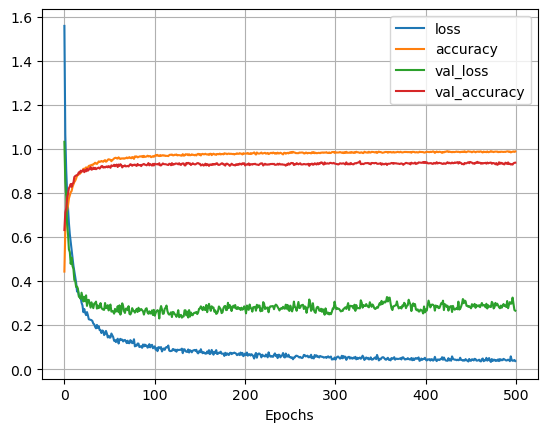

In [73]:
pd.DataFrame(model6_history.history).plot()
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)
plt.show()

## Model 6 Evaluation

In [74]:
model6.evaluate(X_test_scale, y_test)

104/104 [==============================] - 0s 2ms/step - loss: 0.2655 - accuracy: 0.9372


[0.26549389958381653, 0.9372156262397766]

In [75]:
y_pred = np.argmax(model6.predict(X_test_scale),axis=1)

macro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'macro')
print(f"Macro-Averaged Precision score: {round(macro_averaged_precision, 4)}")

micro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged Precision score: {round(micro_averaged_precision, 4)}")

macro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'macro')
print(f"Macro-averaged recall score: {round(macro_averaged_recall, 4)}")

micro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged recall score: {round(micro_averaged_recall, 4)}")

macro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'macro')
print(f"Macro-Averaged F1 score: {round(macro_averaged_f1, 4)}")

micro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged F1 score: {round(micro_averaged_f1, 4)}")

104/104 [==============================] - 0s 2ms/step
Macro-Averaged Precision score: 0.9374
Micro-Averaged Precision score: 0.9372
Macro-averaged recall score: 0.9371
Micro-Averaged recall score: 0.9372
Macro-Averaged F1 score: 0.9369
Micro-Averaged F1 score: 0.9372


# Model 7
## Model 7 Training

In [76]:
model7 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(X_train_scale.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="softmax"),
])

## Compilation

In [77]:
model7.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## Model 7 Fitting

In [78]:
model7_history = model7.fit(X_train_scale, y_train, validation_data=(X_test_scale, y_test), epochs=500, batch_size=128)

Epoch 1/500
53/53 [==============================] - 1s 14ms/step - loss: 1.9077 - accuracy: 0.2985 - val_loss: 1.4303 - val_accuracy: 0.4513
Epoch 2/500
53/53 [==============================] - 0s 9ms/step - loss: 1.5492 - accuracy: 0.4384 - val_loss: 1.1548 - val_accuracy: 0.5896
Epoch 3/500
53/53 [==============================] - 0s 9ms/step - loss: 1.4100 - accuracy: 0.5007 - val_loss: 1.0512 - val_accuracy: 0.6330
Epoch 4/500
53/53 [==============================] - 1s 10ms/step - loss: 1.3234 - accuracy: 0.5353 - val_loss: 0.9884 - val_accuracy: 0.6633
Epoch 5/500
53/53 [==============================] - 1s 10ms/step - loss: 1.2717 - accuracy: 0.5495 - val_loss: 0.9524 - val_accuracy: 0.6585
Epoch 6/500
53/53 [==============================] - 1s 9ms/step - loss: 1.2120 - accuracy: 0.5710 - val_loss: 0.8916 - val_accuracy: 0.6970
Epoch 7/500
53/53 [==============================] - 1s 10ms/step - loss: 1.1855 - accuracy: 0.5811 - val_loss: 0.8405 - val_accuracy: 0.7119
Epoch 8/5

53/53 [==============================] - 0s 9ms/step - loss: 0.6826 - accuracy: 0.7669 - val_loss: 0.4102 - val_accuracy: 0.8581
Epoch 59/500
53/53 [==============================] - 0s 9ms/step - loss: 0.7003 - accuracy: 0.7614 - val_loss: 0.4159 - val_accuracy: 0.8571
Epoch 60/500
53/53 [==============================] - 0s 9ms/step - loss: 0.6838 - accuracy: 0.7626 - val_loss: 0.4182 - val_accuracy: 0.8529
Epoch 61/500
53/53 [==============================] - 0s 9ms/step - loss: 0.6938 - accuracy: 0.7657 - val_loss: 0.4213 - val_accuracy: 0.8620
Epoch 62/500
53/53 [==============================] - 0s 9ms/step - loss: 0.6908 - accuracy: 0.7666 - val_loss: 0.4098 - val_accuracy: 0.8623
Epoch 63/500
53/53 [==============================] - 0s 9ms/step - loss: 0.6932 - accuracy: 0.7611 - val_loss: 0.4017 - val_accuracy: 0.8647
Epoch 64/500
53/53 [==============================] - 0s 9ms/step - loss: 0.6832 - accuracy: 0.7644 - val_loss: 0.4100 - val_accuracy: 0.8632
Epoch 65/500
53/53 

53/53 [==============================] - 0s 9ms/step - loss: 0.5757 - accuracy: 0.8083 - val_loss: 0.3252 - val_accuracy: 0.8926
Epoch 116/500
53/53 [==============================] - 0s 8ms/step - loss: 0.5563 - accuracy: 0.8077 - val_loss: 0.3377 - val_accuracy: 0.8866
Epoch 117/500
53/53 [==============================] - 0s 8ms/step - loss: 0.5570 - accuracy: 0.8073 - val_loss: 0.3235 - val_accuracy: 0.8935
Epoch 118/500
53/53 [==============================] - 0s 8ms/step - loss: 0.5488 - accuracy: 0.8143 - val_loss: 0.3198 - val_accuracy: 0.8944
Epoch 119/500
53/53 [==============================] - 0s 8ms/step - loss: 0.5545 - accuracy: 0.8146 - val_loss: 0.3256 - val_accuracy: 0.8954
Epoch 120/500
53/53 [==============================] - 0s 8ms/step - loss: 0.5653 - accuracy: 0.8086 - val_loss: 0.3281 - val_accuracy: 0.8948
Epoch 121/500
53/53 [==============================] - 0s 9ms/step - loss: 0.5570 - accuracy: 0.8158 - val_loss: 0.3151 - val_accuracy: 0.8969
Epoch 122/500

53/53 [==============================] - 0s 9ms/step - loss: 0.5222 - accuracy: 0.8258 - val_loss: 0.2896 - val_accuracy: 0.9120
Epoch 173/500
53/53 [==============================] - 0s 9ms/step - loss: 0.5055 - accuracy: 0.8282 - val_loss: 0.2893 - val_accuracy: 0.9136
Epoch 174/500
53/53 [==============================] - 1s 10ms/step - loss: 0.5043 - accuracy: 0.8318 - val_loss: 0.2905 - val_accuracy: 0.9090
Epoch 175/500
53/53 [==============================] - 0s 9ms/step - loss: 0.5080 - accuracy: 0.8355 - val_loss: 0.2945 - val_accuracy: 0.9075
Epoch 176/500
53/53 [==============================] - 0s 8ms/step - loss: 0.4914 - accuracy: 0.8333 - val_loss: 0.2909 - val_accuracy: 0.9102
Epoch 177/500
53/53 [==============================] - 0s 8ms/step - loss: 0.5136 - accuracy: 0.8345 - val_loss: 0.2970 - val_accuracy: 0.9060
Epoch 178/500
53/53 [==============================] - 0s 8ms/step - loss: 0.5004 - accuracy: 0.8342 - val_loss: 0.2971 - val_accuracy: 0.9081
Epoch 179/50

53/53 [==============================] - 0s 9ms/step - loss: 0.4770 - accuracy: 0.8458 - val_loss: 0.2714 - val_accuracy: 0.9090
Epoch 230/500
53/53 [==============================] - 0s 9ms/step - loss: 0.4482 - accuracy: 0.8458 - val_loss: 0.2699 - val_accuracy: 0.9117
Epoch 231/500
53/53 [==============================] - 0s 8ms/step - loss: 0.4639 - accuracy: 0.8486 - val_loss: 0.2793 - val_accuracy: 0.9126
Epoch 232/500
53/53 [==============================] - 0s 8ms/step - loss: 0.4547 - accuracy: 0.8439 - val_loss: 0.2810 - val_accuracy: 0.9117
Epoch 233/500
53/53 [==============================] - 0s 9ms/step - loss: 0.4855 - accuracy: 0.8361 - val_loss: 0.2833 - val_accuracy: 0.9099
Epoch 234/500
53/53 [==============================] - 0s 8ms/step - loss: 0.4793 - accuracy: 0.8400 - val_loss: 0.2758 - val_accuracy: 0.9111
Epoch 235/500
53/53 [==============================] - 0s 9ms/step - loss: 0.4611 - accuracy: 0.8478 - val_loss: 0.2675 - val_accuracy: 0.9145
Epoch 236/500

53/53 [==============================] - 0s 9ms/step - loss: 0.4201 - accuracy: 0.8584 - val_loss: 0.2578 - val_accuracy: 0.9175
Epoch 287/500
53/53 [==============================] - 0s 9ms/step - loss: 0.4489 - accuracy: 0.8473 - val_loss: 0.2521 - val_accuracy: 0.9230
Epoch 288/500
53/53 [==============================] - 0s 9ms/step - loss: 0.4451 - accuracy: 0.8537 - val_loss: 0.2674 - val_accuracy: 0.9166
Epoch 289/500
53/53 [==============================] - 0s 9ms/step - loss: 0.4396 - accuracy: 0.8542 - val_loss: 0.2659 - val_accuracy: 0.9151
Epoch 290/500
53/53 [==============================] - 0s 9ms/step - loss: 0.4209 - accuracy: 0.8609 - val_loss: 0.2609 - val_accuracy: 0.9181
Epoch 291/500
53/53 [==============================] - 0s 9ms/step - loss: 0.4503 - accuracy: 0.8537 - val_loss: 0.2667 - val_accuracy: 0.9151
Epoch 292/500
53/53 [==============================] - 0s 9ms/step - loss: 0.4397 - accuracy: 0.8558 - val_loss: 0.2667 - val_accuracy: 0.9160
Epoch 293/500

53/53 [==============================] - 1s 9ms/step - loss: 0.4106 - accuracy: 0.8642 - val_loss: 0.2579 - val_accuracy: 0.9193
Epoch 344/500
53/53 [==============================] - 1s 10ms/step - loss: 0.4111 - accuracy: 0.8663 - val_loss: 0.2651 - val_accuracy: 0.9151
Epoch 345/500
53/53 [==============================] - 0s 9ms/step - loss: 0.4146 - accuracy: 0.8625 - val_loss: 0.2575 - val_accuracy: 0.9217
Epoch 346/500
53/53 [==============================] - 0s 9ms/step - loss: 0.4176 - accuracy: 0.8640 - val_loss: 0.2610 - val_accuracy: 0.9154
Epoch 347/500
53/53 [==============================] - 0s 9ms/step - loss: 0.4051 - accuracy: 0.8652 - val_loss: 0.2588 - val_accuracy: 0.9151
Epoch 348/500
53/53 [==============================] - 0s 9ms/step - loss: 0.4078 - accuracy: 0.8667 - val_loss: 0.2588 - val_accuracy: 0.9184
Epoch 349/500
53/53 [==============================] - 0s 9ms/step - loss: 0.4044 - accuracy: 0.8652 - val_loss: 0.2491 - val_accuracy: 0.9193
Epoch 350/50

53/53 [==============================] - 0s 8ms/step - loss: 0.4004 - accuracy: 0.8655 - val_loss: 0.2576 - val_accuracy: 0.9224
Epoch 401/500
53/53 [==============================] - 0s 8ms/step - loss: 0.3932 - accuracy: 0.8679 - val_loss: 0.2429 - val_accuracy: 0.9251
Epoch 402/500
53/53 [==============================] - 0s 8ms/step - loss: 0.3903 - accuracy: 0.8693 - val_loss: 0.2459 - val_accuracy: 0.9233
Epoch 403/500
53/53 [==============================] - 0s 8ms/step - loss: 0.3979 - accuracy: 0.8687 - val_loss: 0.2500 - val_accuracy: 0.9242
Epoch 404/500
53/53 [==============================] - 0s 9ms/step - loss: 0.4090 - accuracy: 0.8684 - val_loss: 0.2385 - val_accuracy: 0.9293
Epoch 405/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3973 - accuracy: 0.8730 - val_loss: 0.2466 - val_accuracy: 0.9196
Epoch 406/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3964 - accuracy: 0.8661 - val_loss: 0.2457 - val_accuracy: 0.9208
Epoch 407/500

53/53 [==============================] - 0s 9ms/step - loss: 0.3933 - accuracy: 0.8646 - val_loss: 0.2296 - val_accuracy: 0.9248
Epoch 458/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3856 - accuracy: 0.8676 - val_loss: 0.2323 - val_accuracy: 0.9269
Epoch 459/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3657 - accuracy: 0.8791 - val_loss: 0.2416 - val_accuracy: 0.9242
Epoch 460/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3829 - accuracy: 0.8776 - val_loss: 0.2432 - val_accuracy: 0.9224
Epoch 461/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3875 - accuracy: 0.8699 - val_loss: 0.2389 - val_accuracy: 0.9248
Epoch 462/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3926 - accuracy: 0.8745 - val_loss: 0.2408 - val_accuracy: 0.9224
Epoch 463/500
53/53 [==============================] - 0s 9ms/step - loss: 0.3690 - accuracy: 0.8769 - val_loss: 0.2508 - val_accuracy: 0.9233
Epoch 464/500

## Model 7 Validation

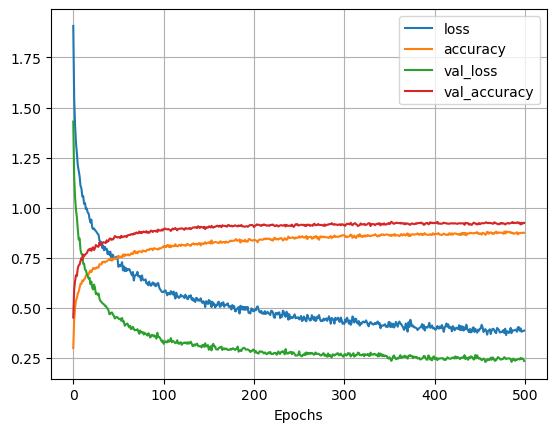

In [79]:
pd.DataFrame(model7_history.history).plot()
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)
plt.show()

## Model 7 Evaluation

In [80]:
model7.evaluate(X_test_scale, y_test)

104/104 [==============================] - 0s 3ms/step - loss: 0.2342 - accuracy: 0.9239


[0.2341584861278534, 0.9238702058792114]

In [81]:
y_pred = np.argmax(model7.predict(X_test_scale),axis=1)

macro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'macro')
print(f"Macro-Averaged Precision score: {round(macro_averaged_precision, 4)}")

micro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged Precision score: {round(micro_averaged_precision, 4)}")

macro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'macro')
print(f"Macro-averaged recall score: {round(macro_averaged_recall, 4)}")

micro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged recall score: {round(micro_averaged_recall, 4)}")

macro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'macro')
print(f"Macro-Averaged F1 score: {round(macro_averaged_f1, 4)}")

micro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged F1 score: {round(micro_averaged_f1, 4)}")

104/104 [==============================] - 0s 2ms/step
Macro-Averaged Precision score: 0.9253
Micro-Averaged Precision score: 0.9239
Macro-averaged recall score: 0.9235
Micro-Averaged recall score: 0.9239
Macro-Averaged F1 score: 0.9238
Micro-Averaged F1 score: 0.9239
